<h1><center>House Price Portfolio Project</center></h1>

What is a house?
> According to **Wikipedia**, a house is a single-unit residential building. It may range in complexity from a rudimentary hut to a complex structure of wood, masonry, concrete, or other material, outfitted with plumbing, electrical, heating, ventilation, and air conditioning systems.

<div style="text-align: justify"> Some houses are limited to one or more of the same number of families or social groups. People usually go outside to work, attend school, or do other activities that require social interaction in everyday activities. The most frequent activity in the house is rest and sleeping. </div>

<div style="text-align: justify"> A modern house consists of several rooms that each have a specific function: the bedroom, the bathroom, the kitchen, the living room, the dining room, the basement, and so forth. </div>

<div style="text-align: justify"> According to the explanation above, many people would like to own a house. To own a house, some of them built it from an empty space. Meanwhile, the others bought it directly from another person. When it comes to buying a house, many considerations need attention like how many bedrooms and bathrooms are there, how about the house’s condition, when the house was built, and the most important question what is the right price for a house. </div>

<div style="text-align: justify"> Some people find it difficult to decide whether it is the right price or not. To answer this question, I tried to help by building a machine learning model that predicts the price of a house. In creating this machine learning model, I used the dataset from Kaggle. </div>

<h1><center>A. Data Profiling</center></h1>

What’s data profiling?
> **Data Profiling** is summarizing data using descriptive statistics. Creating data profiling aims to have a strong understanding of data to compile framework analysis and visualize data.

Before creating a machine learning model, I need to understand the data first. So I’ll do data profiling to get a better data understanding.

## 1. Importing Library

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from datetime import datetime, date

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.4
seaborn version :  0.11.2


## 2. Importing Data

The second step is initializing the library, importing the dataset into python using **Pandas**, and assigning it as **df**. The data will be saved as **‘HousePrice.csv’**.

In [2]:
df = pd.read_csv('HousePrice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Showing The Length of The Data

In [3]:
print("The Length of The Data:", len(df))

The Length of The Data: 21613


The third step is to **display how much data on the dataset** using **len()**. The result is the size of this data is **21613**.

## 4. Showing The Shape of The Data

In [4]:
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (21613, 21)


The fourth step is to **display how many rows and columns in the data** use **.shape**. The result is this data has **21613 rows and 21 columns**.

## 5. Showing The Information of The Data

In [5]:
print("The Information of The Data: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The fifth step is to **get information from the data about what kind of type for each column** using the **.info()**. As you can see, there are three types of data: **object, int64, and float64**.

## 6. Checking The Outliers

Outliers are extreme values that stand out significantly from the overall pattern of values in a dataset or graph.

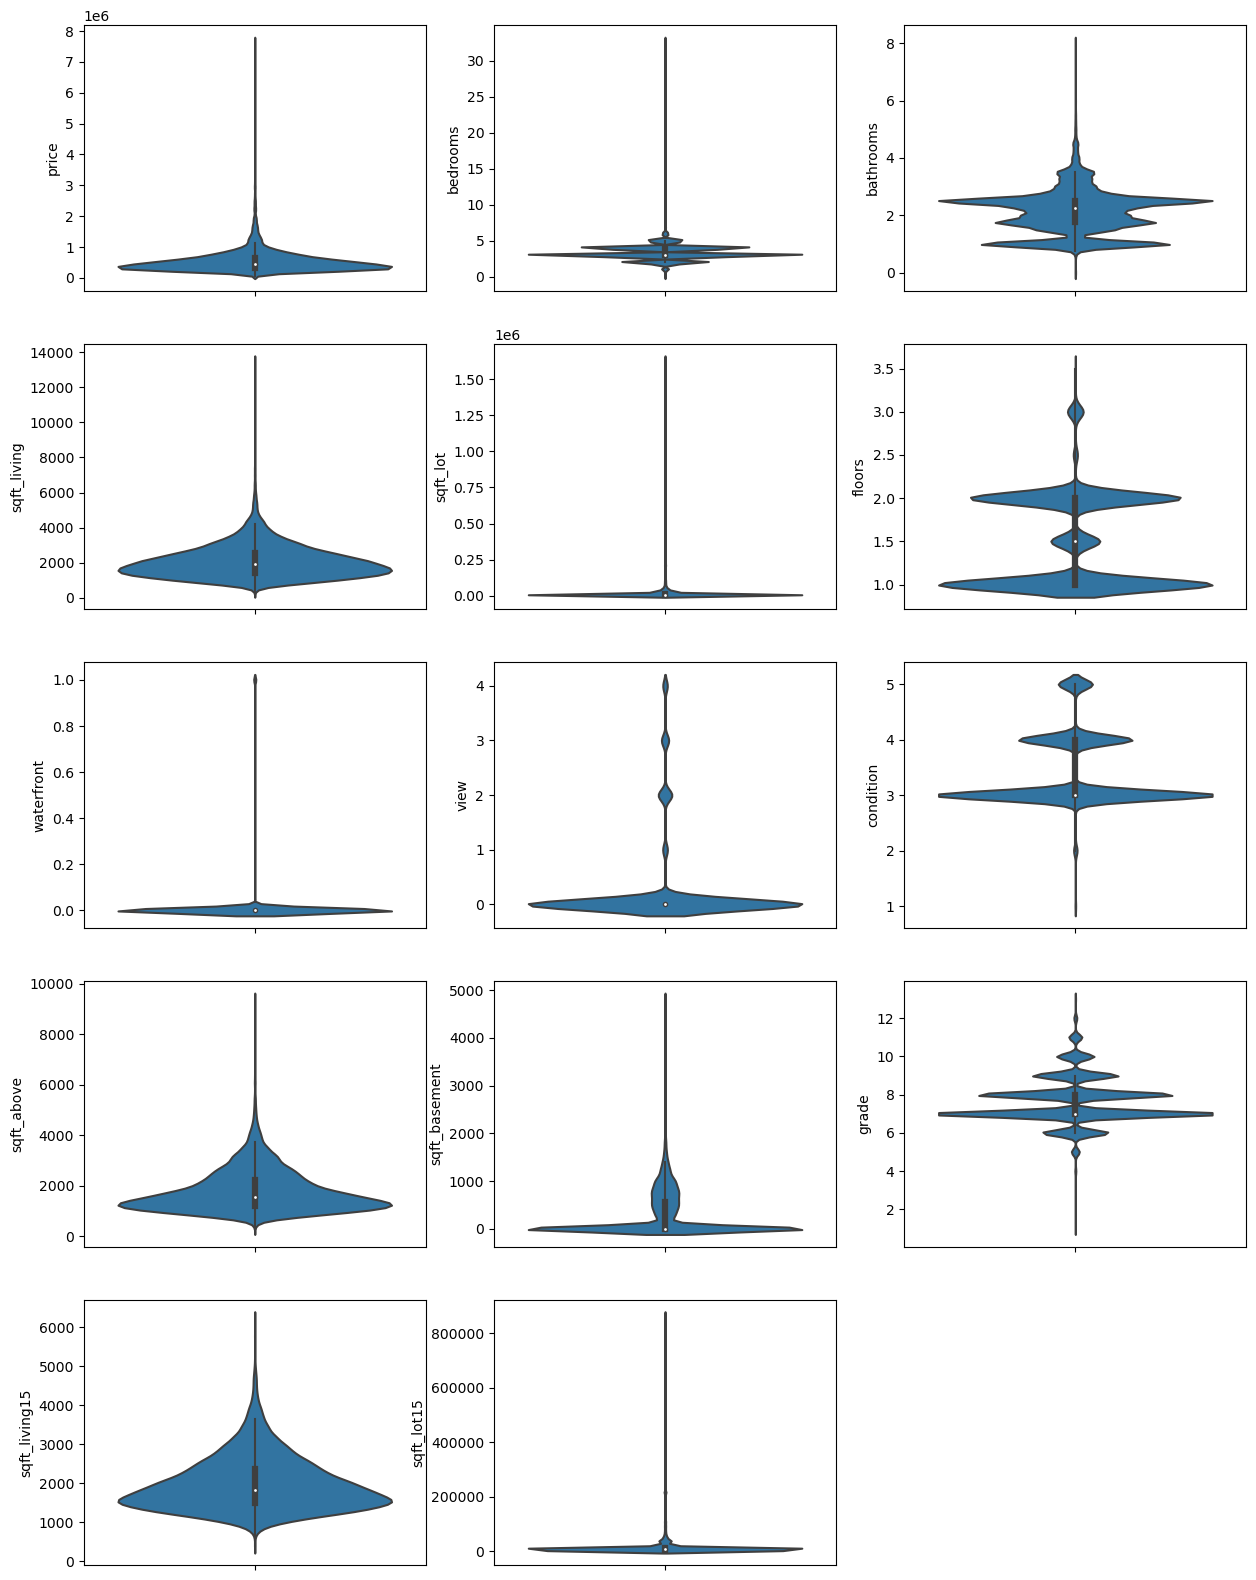

In [6]:
nums = ['price', 
        'bedrooms', 
        'bathrooms', 
        'sqft_living', 
        'sqft_lot', 
        'floors', 
        'waterfront', 
        'view', 
        'condition', 
        'sqft_above', 
        'sqft_basement', 
        'grade', 
        'sqft_living15', 
        'sqft_lot15']

from matplotlib.gridspec import GridSpec    
fig = plt.figure(figsize=(15, 20))
grid = GridSpec(ncols=3, nrows=5, figure=fig)
for i, name in enumerate(nums):
    ax = fig.add_subplot(grid[i])
    sns.violinplot(y = df[nums[i]], orient='v')
plt.show()

<h1><center>B. Data Cleansing</center></h1>

After data profiling, I'll do data cleansing. What's data cleansing?
> **Data cleansing** is identifying incorrect, incomplete, inaccurate, irrelevant, or missing data and then modifying, replacing, or deleting them according to the need.

<h2><center>B.1. Checking The id Column</center></h2>

The id column containing Unique ID for each home sold.

### 1. Renaming The Column's Name

In [7]:
df.rename(columns ={'id': 'ID'}, inplace=True)

### 2. Changing The ID Column Data Type

In [8]:
df["ID"] = df['ID'].astype(str)

### 3. Checking Duplicate Value

In [9]:
if df["ID"].nunique() == len(df["ID"]):
    print("There is no duplicate ID")
else:
    print("There is a duplicate ID")

There is a duplicate ID


### 4. Checking The Description of The ID Column

In [10]:
df["ID"].describe().T

count         21613
unique        21436
top       795000620
freq              3
Name: ID, dtype: object

There are **21613 ID** in this data, and **21436 Unique ID**. The **795000620** ID has **the most amount** with **3**.

### 5. Checking The Missing Value in The ID Column

In [11]:
missing_value_ID = df["ID"].isnull().sum()
if missing_value_ID > 0:
    print("There are " + str(missing_value_ID) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.2. Checking The date Column</center></h2>

The date column containing the date of the home sale.

### 1. Renaming The Column's Name

In [12]:
df.rename(columns ={'date': 'Date'}, inplace=True)

### 2. Changing The Date Column Data Type

In [13]:
df["Date"] = pd.to_datetime(df['Date'])

### 3. Checking The Description of The Date Column

In [14]:
df["Date"].describe(datetime_is_numeric=False).T

C:\Users\Luthfi\AppData\Local\Temp\ipykernel_3932\1014815203.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Date"].describe(datetime_is_numeric=False).T


count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: Date, dtype: object

### 4. Checking The Missing Value in The Date Column

In [15]:
missing_value_Date = df["Date"].isnull().sum()
if missing_value_Date > 0:
    print("There are " + str(missing_value_Date) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.3. Checking The price Column</center></h2>

The price column containing the price of each home sold.

### 1. Renaming The Column's Name

In [16]:
df.rename(columns ={'price': 'Price'}, inplace=True)

### 2. Plotting The Price Column

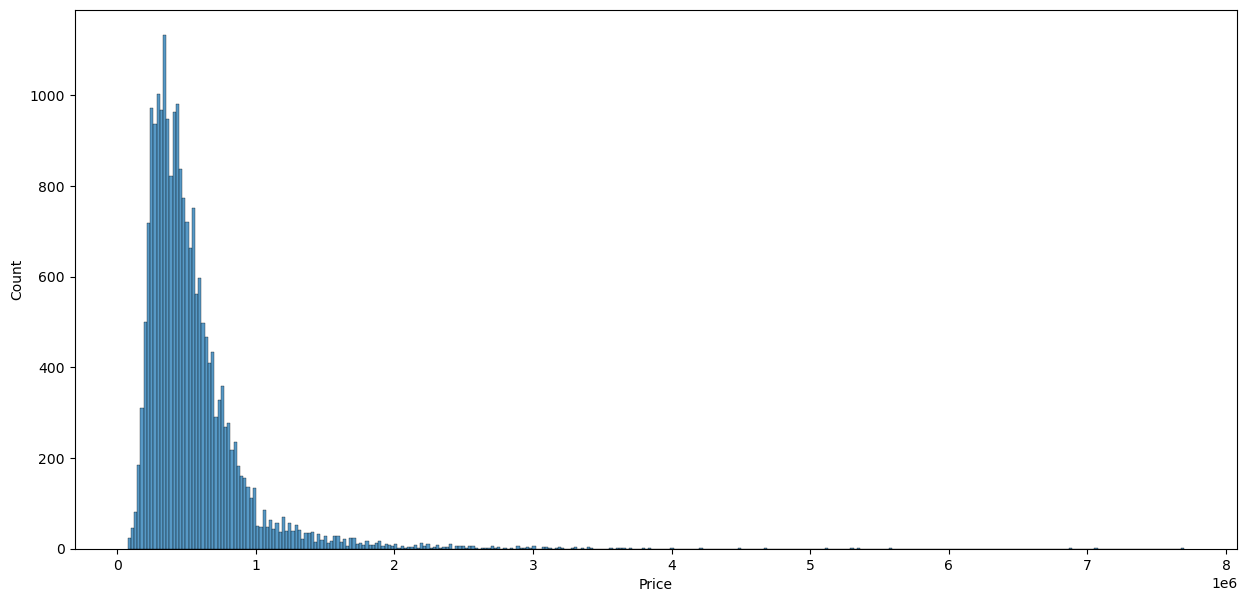

In [17]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Price'])
plt.show()

### 3. Checking The Description of The Price Column

In [18]:
df["Price"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


### 4. Checking The Missing Value in The Price Column

In [19]:
missing_value_Price = df["Price"].isnull().sum()
if missing_value_Price > 0:
    print("There are " + str(missing_value_Price) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.4. Checking The bedrooms Column</center></h2>

The bedrooms column containing the number of bedroom in each home sold.

### 1. Renaming The Column's Name

In [20]:
df.rename(columns ={'bedrooms': 'Bedrooms'}, inplace=True)

### 2. Plotting The Bedrooms Column

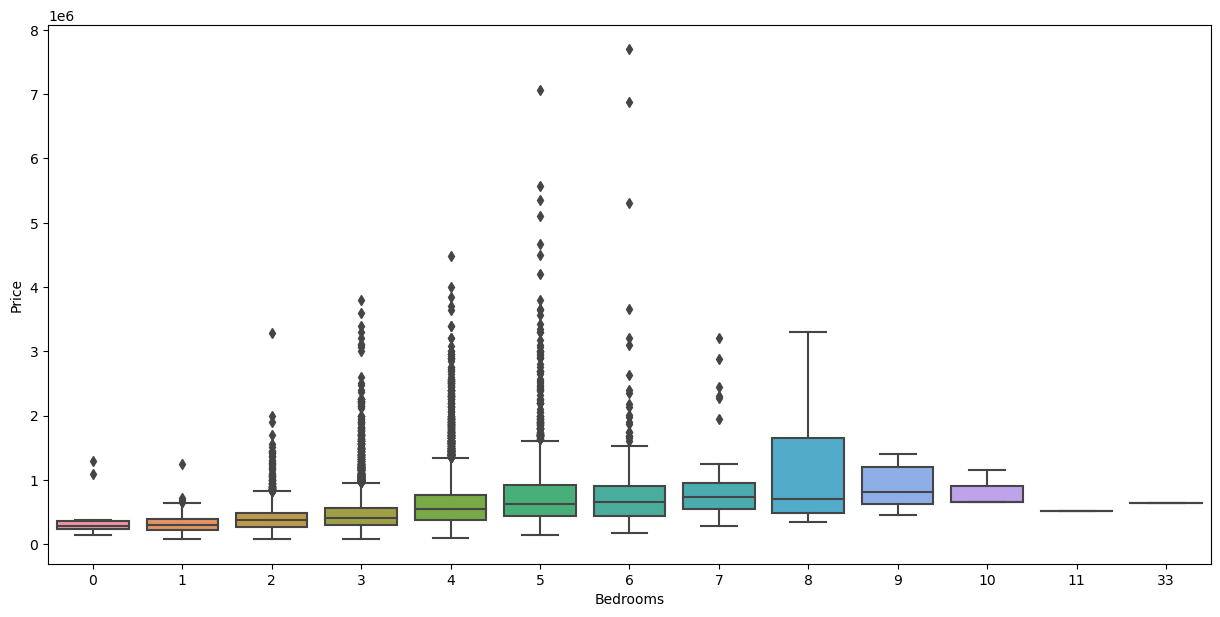

In [21]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.show()

As you can see from Figure above, there are 13 kinds of data in the Bedrooms column: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33. These numbers indicate the number of bedrooms inside the house.

### 3. Checking The Description of The Bedrooms Column

In [22]:
df["Bedrooms"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,21613.0,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0


### 4. Checking The Missing Value in The Bedrooms Column

In [23]:
missing_value_Bedrooms = df["Bedrooms"].isnull().sum()
if missing_value_Bedrooms > 0:
    print("There are " + str(missing_value_Bedrooms) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.5. Checking The bathrooms Column</center></h2>

The bathrooms column containing the number of bathroom in each home sold.

### 1. Renaming The Column's Name

In [24]:
df.rename(columns ={'bathrooms': 'Bathrooms'}, inplace=True)

### 2. Plotting The Bathrooms Column

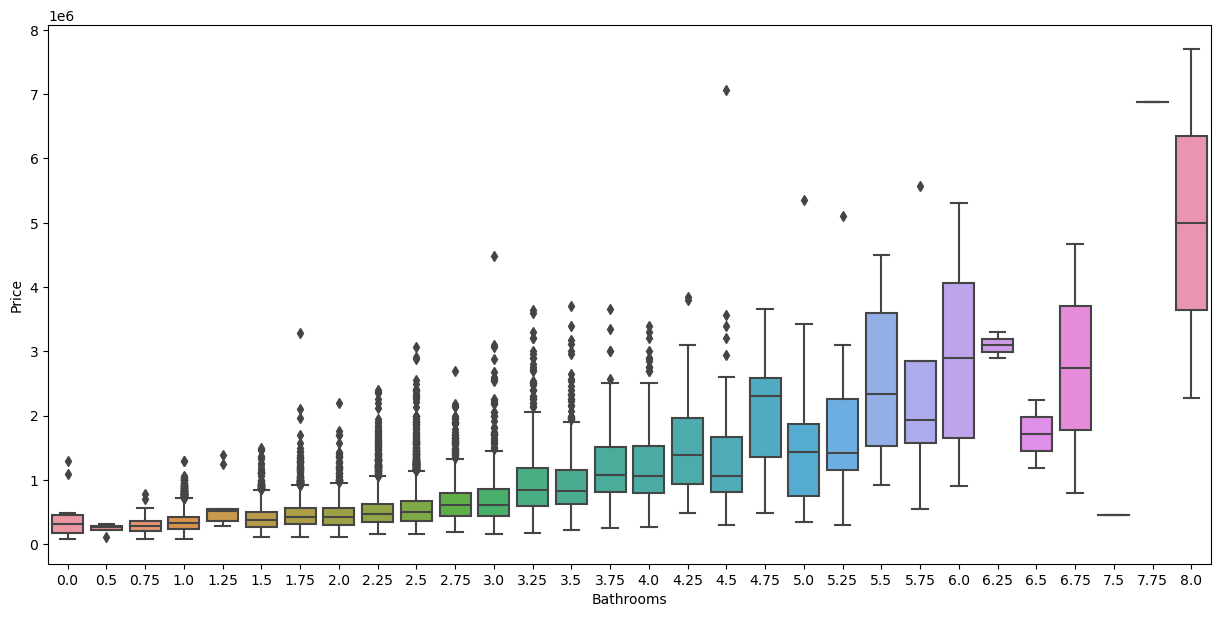

In [25]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.show()

As you can see from Figure above, there are 30 kinds of data in the Bathrooms column. These numbers indicate the number of bathroom inside the house. Traditionally, a full bathroom contains at least one sink, one toilet, a shower and a bath, so a .75 bathroom only has either a shower or a bath.

### 3. Checking The Description of The Bathrooms Column

In [26]:
df["Bathrooms"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0


### 4. Checking The Missing Value in The Bathrooms Column

In [27]:
missing_value_Bathrooms = df["Bathrooms"].isnull().sum()
if missing_value_Bathrooms > 0:
    print("There are " + str(missing_value_Bathrooms) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.6. Checking The sqft_living, sqft_lot, sqft_living15, sqft_lot15, and sqft_above Column</center></h2>

- The sqft_living column containing the square footage of the apartments interior living space.
- The sqft_lot column containing the square footage of the land space.
- The sqft_above column containing the square footage of the interior housing space that is above ground level.
- The sqft_living15 column containing the square footage of interior housing living space for the nearest 15 neighbors.
- The sqft_lot15 column containing the square footage of the land lots of the nearest 15 neighbors.

### 1. Renaming The Column's Name

In [28]:
df.rename(columns ={'sqft_living': 'Square Meter Living', 
                    'sqft_lot': 'Square Meter Lot', 
                    'sqft_above': 'Square Meter Above', 
                    'sqft_living15': 'Square Meter Living 15', 
                    'sqft_lot15': 'Square Meter Lot 15'}, inplace=True)

### 2. Changing The Column's Value Into Square Meter

I will change the values in the kolom_square_meter. Previously, this column used Square Feet; now, I will convert it into Square Meter.

In [29]:
sqmt_column = df.columns[df.columns.str.contains('Square Meter')]
df[sqmt_column] = df[sqmt_column].apply(lambda x: round(x*0.09290304))

### 3. Plotting The Square Meter Column

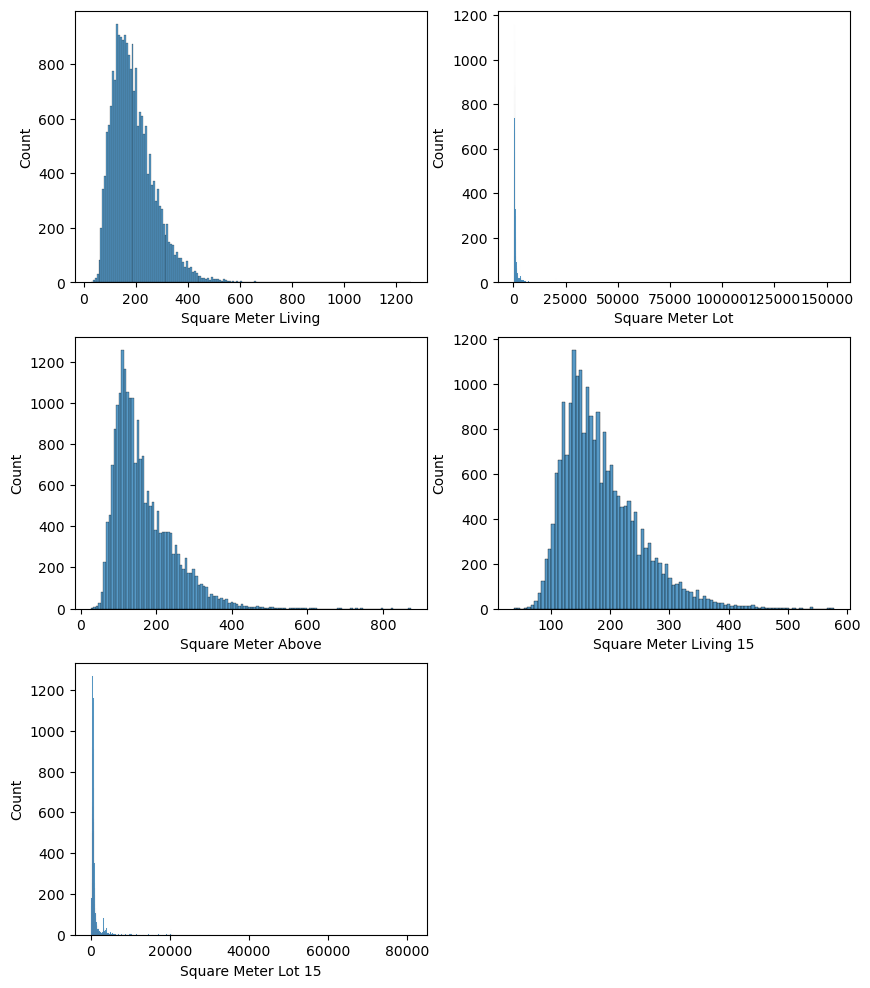

In [30]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 12))
grid = GridSpec(ncols=2, nrows=3, figure=fig)
for i, name in enumerate(sqmt_column):
    ax = fig.add_subplot(grid[i])
    sns.histplot(df[name], ax=ax)
plt.show()

### 4. Checking The Description of The Square Meter Column

In [31]:
df[sqmt_column].describe().T

,count,mean,std,min,25%,50%,75%,max
Square Meter Living,21613.0,193.227780,85.328745,27.0,133.0,177.0,237.0,1258.0
Square Meter Lot,21613.0,1403.487253,3848.088458,48.0,468.0,708.0,993.0,153416.0
Square Meter Above,21613.0,166.143340,76.938325,27.0,111.0,145.0,205.0,874.0
Square Meter Living 15,21613.0,184.558368,63.678510,37.0,138.0,171.0,219.0,577.0
Square Meter Lot 15,21613.0,1186.236663,2536.638060,60.0,474.0,708.0,937.0,80937.0


### 5. Checking The Missing Value in The Square Meter Column

In [32]:
missing_value_Square_Meter_Living = df["Square Meter Living"].isnull().sum()
if missing_value_Square_Meter_Living > 0:
    print("In The Square Meter Living column there are " + str(missing_value_Square_Meter_Living) + " missing values in this column.")
else:
    print("There is no missing values in the Square Meter Living column.")

There is no missing values in the Square Meter Living column.


In [33]:
missing_value_Square_Meter_Lot = df["Square Meter Lot"].isnull().sum()
if missing_value_Square_Meter_Lot > 0:
    print("In The Square Meter Lot column there are " + str(missing_value_Square_Meter_Lot) + " missing values in this column.")
else:
    print("There is no missing values in the Square Meter Lot column.")

There is no missing values in the Square Meter Lot column.


In [34]:
missing_value_Square_Meter_Above = df["Square Meter Above"].isnull().sum()
if missing_value_Square_Meter_Above > 0:
    print("In The Square Meter Above column there are " + str(missing_value_Square_Meter_Above) + " missing values in this column.")
else:
    print("There is no missing values in the Square Meter Above column.")

There is no missing values in the Square Meter Above column.


In [35]:
missing_value_Square_Meter_Living_15 = df["Square Meter Living 15"].isnull().sum()
if missing_value_Square_Meter_Living_15 > 0:
    print("In The Square Meter Living 15 column there are " + str(missing_value_Square_Meter_Living_15) + " missing values in this column.")
else:
    print("There is no missing values in the Square Meter Living 15 column.")

There is no missing values in the Square Meter Living 15 column.


In [36]:
missing_value_Square_Meter_Lot_15 = df["Square Meter Lot 15"].isnull().sum()
if missing_value_Square_Meter_Lot_15 > 0:
    print("In The Square Meter Lot 15 column there are " + str(missing_value_Square_Meter_Lot_15) + " missing values in this column.")
else:
    print("There is no missing values in the Square Meter Lot 15 column.")

There is no missing values in the Square Meter Lot 15 column.


<h2><center>B.7. Checking The floors Column</center></h2>

The floors column containing the number of floors in each home sold.

### 1. Renaming The Column's Name

In [37]:
df.rename(columns ={'floors': 'Floors'}, inplace=True)

### 2. Plotting The Floors Column

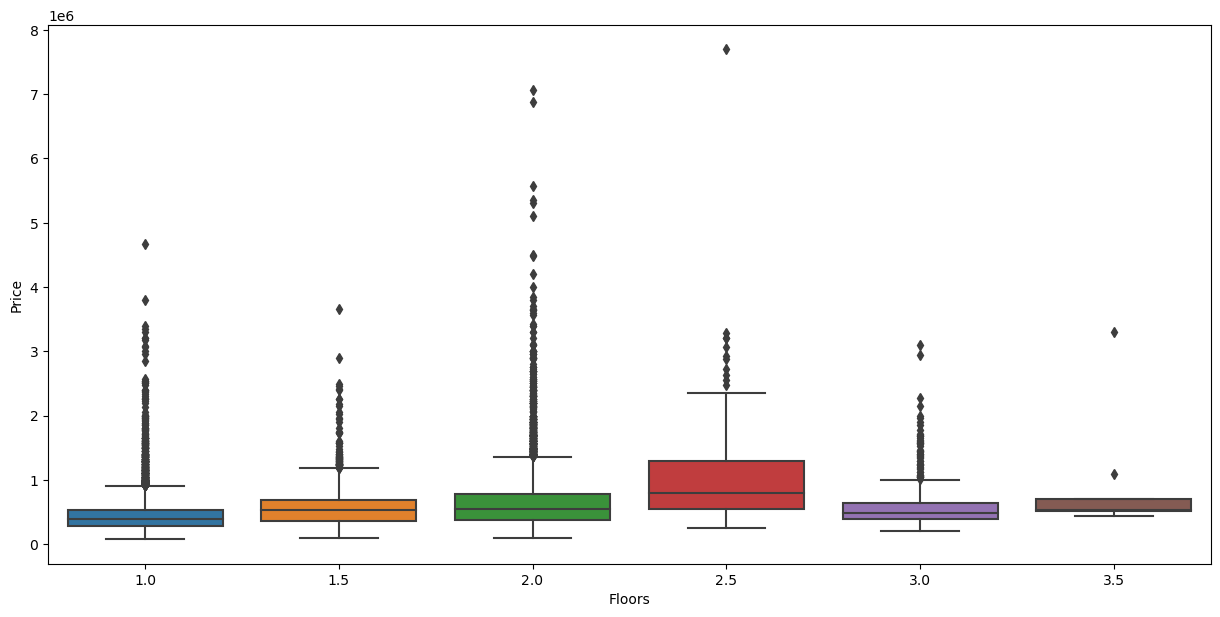

In [38]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Floors', y='Price', data=df)
plt.show()

As you can see from Figure above, there are six kinds of data in the Floors column. These numbers indicate the number of floor inside the house.

### 3. Checking The Description of The Floors Column

In [39]:
df["Floors"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Floors,21613.0,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5


### 4. Checking The Missing Value in The Floors Column

In [40]:
missing_value_Floors = df["Floors"].isnull().sum()
if missing_value_Floors > 0:
    print("There are " + str(missing_value_Floors) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.8. Checking The waterfront Column</center></h2>

The waterfront column containing a dummy variable for whether the apartment was overlooking the waterfront or not.

### 1. Renaming The Column's Name

In [41]:
df.rename(columns ={'waterfront': 'Waterfront'}, inplace=True)

### 2. Plotting The Waterfront Column

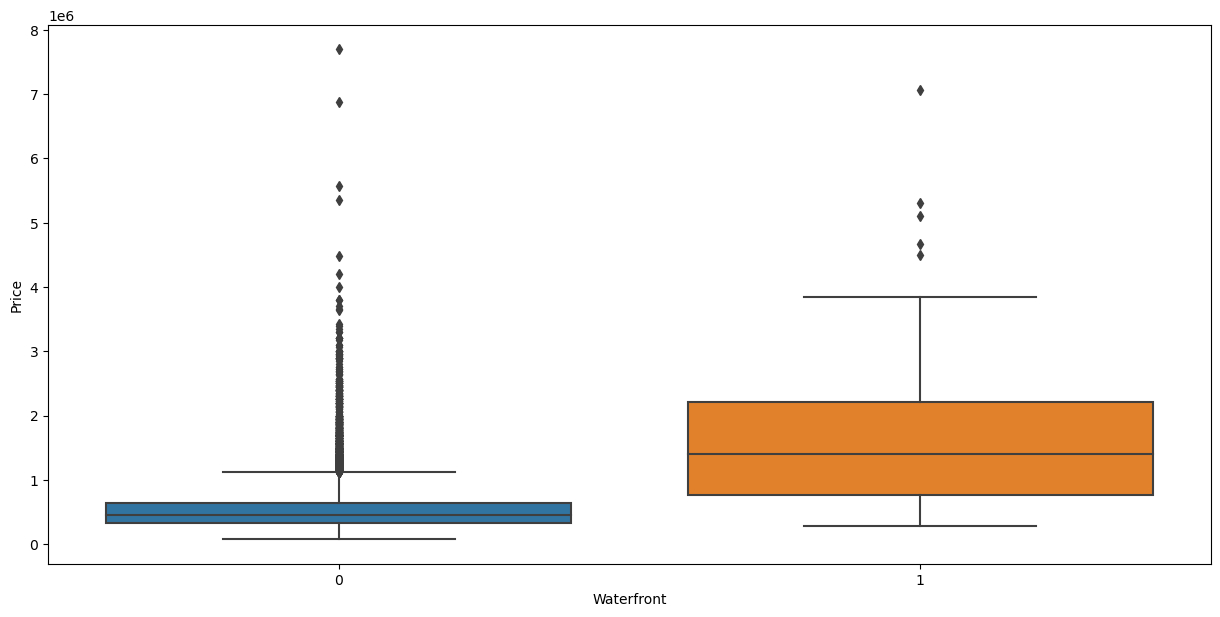

In [42]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Waterfront', y='Price', data=df)
plt.show()

As you can see from Figure above, there are two kinds of data in the Waterfront column. These numbers indicate a dummy variable for whether the apartment was overlooking the waterfront or not.

### 3. Changing The Waterfront Column's Value

I will change these values into "No" and "Yes".

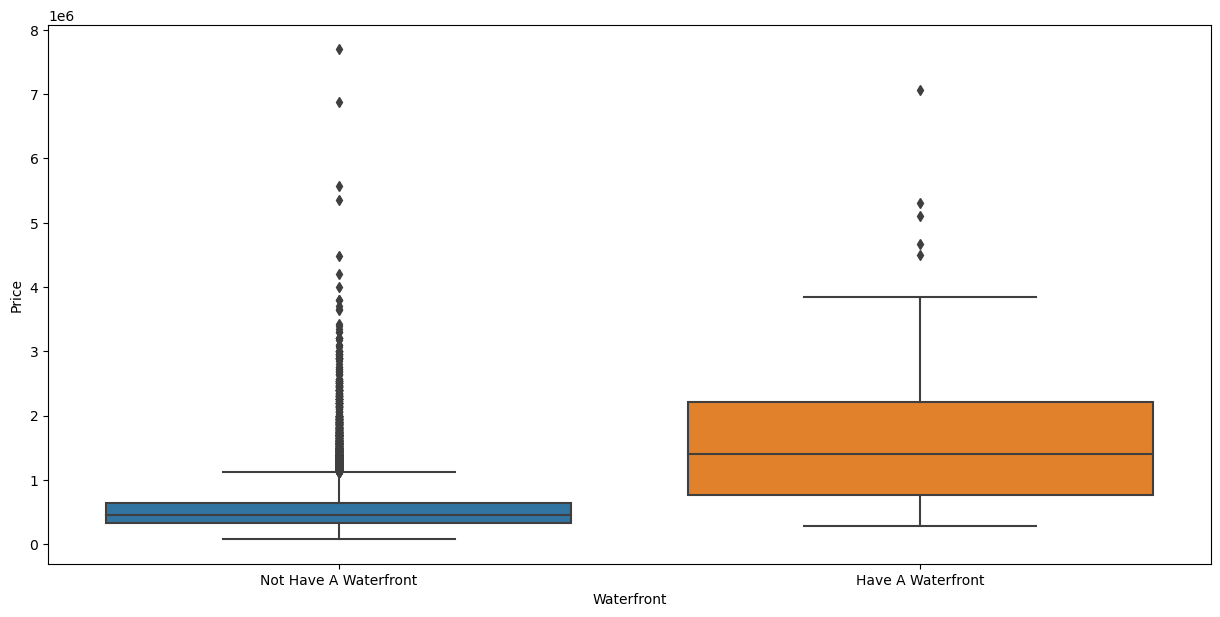

In [43]:
mask_waterfront = {0:"Not Have A Waterfront", 1:"Have A Waterfront"}
df['Waterfront'] = df['Waterfront'].map(mask_waterfront)
plt.figure(figsize=(15, 7))
sns.boxplot(x='Waterfront', y='Price', data=df)
plt.show()

### 4. Checking The Description of The Waterfront Column

In [44]:
df["Waterfront"].describe().to_frame().T

,count,unique,top,freq
Waterfront,21613,2,Not Have A Waterfront,21450


### 5. Checking The Missing Value in The Waterfront Column

In [45]:
missing_value_Waterfront = df["Waterfront"].isnull().sum()
if missing_value_Waterfront > 0:
    print("There are " + str(missing_value_Waterfront) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.9. Checking The view Column</center></h2>

The view column containing an index from 0 to 4 of how good the view of the property was.

### 1. Renaming The Column's Name

In [46]:
df.rename(columns ={'view': 'View'}, inplace=True)

### 2. Plotting The View Column

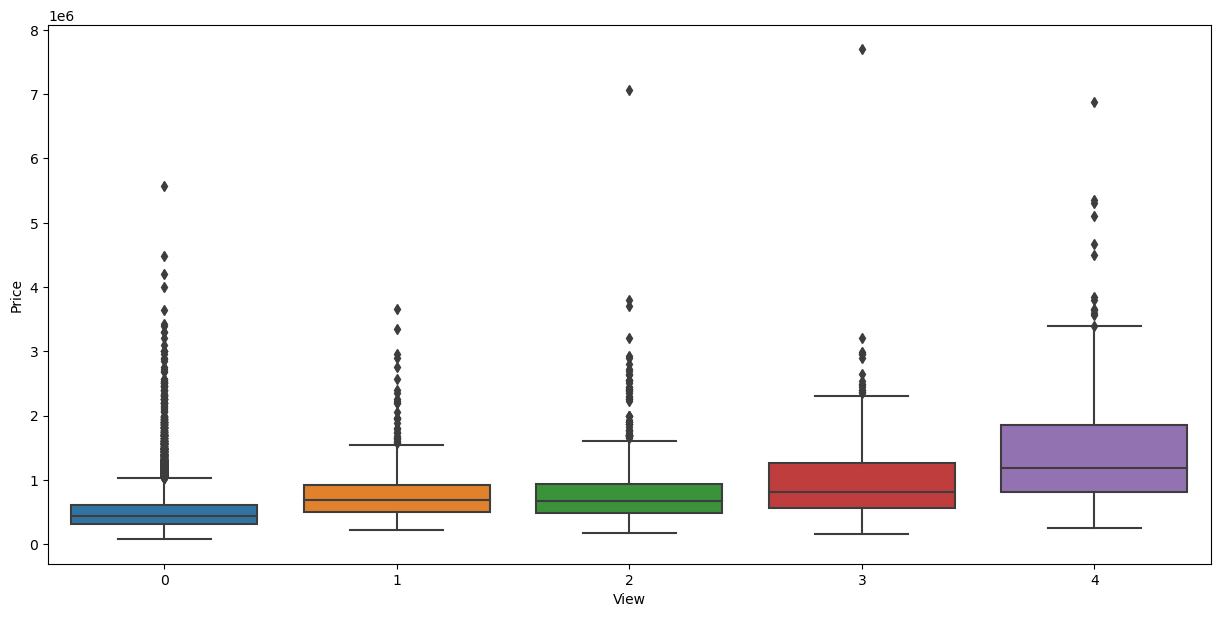

In [47]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='View', y='Price', data=df)
plt.show()

As you can see from Figure above, there are five kinds of data in the View column. These numbers indicate an index from 0 to 4 of how good the view of the property was.

### 3. Changing The View Column's Value

I will change these values into 0 = No View, 1 = Fair View, 2 = Average View, 3 = Good View, 4 = Excellent View.

In [48]:
mask_view = {0:"No View", 1:"Fair View", 2:"Average View", 3:"Good View", 4:"Excellent View"}
df['View'] = df['View'].map(mask_view)

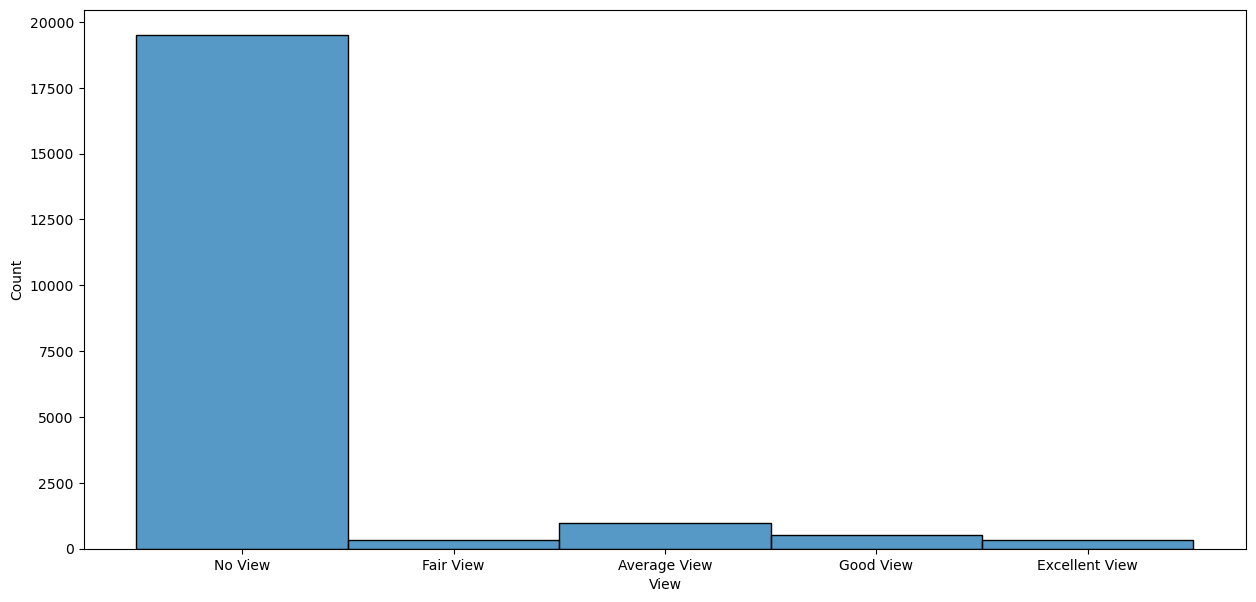

In [49]:
df['View'] = pd.Categorical(df['View'], ["No View", "Fair View", "Average View", "Good View", "Excellent View"])
plt.figure(figsize=(15, 7))
sns.histplot(df['View'])
plt.show()

### 4. Checking The Description of The View Column

In [50]:
df["View"].describe().to_frame().T

,count,unique,top,freq
View,21613,5,No View,19489


### 5. Checking The Missing Value in The View Column

In [51]:
missing_value_View = df["View"].isnull().sum()
if missing_value_View > 0:
    print("There are " + str(missing_value_View) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.10. Checking The condition Column</center></h2>

The condition column containing an index from 1 to 5 on the condition of the apartment.

### 1. Renaming The Column's Name

In [52]:
df.rename(columns ={'condition': 'Condition'}, inplace=True)

### 2. Plotting The Condition Column

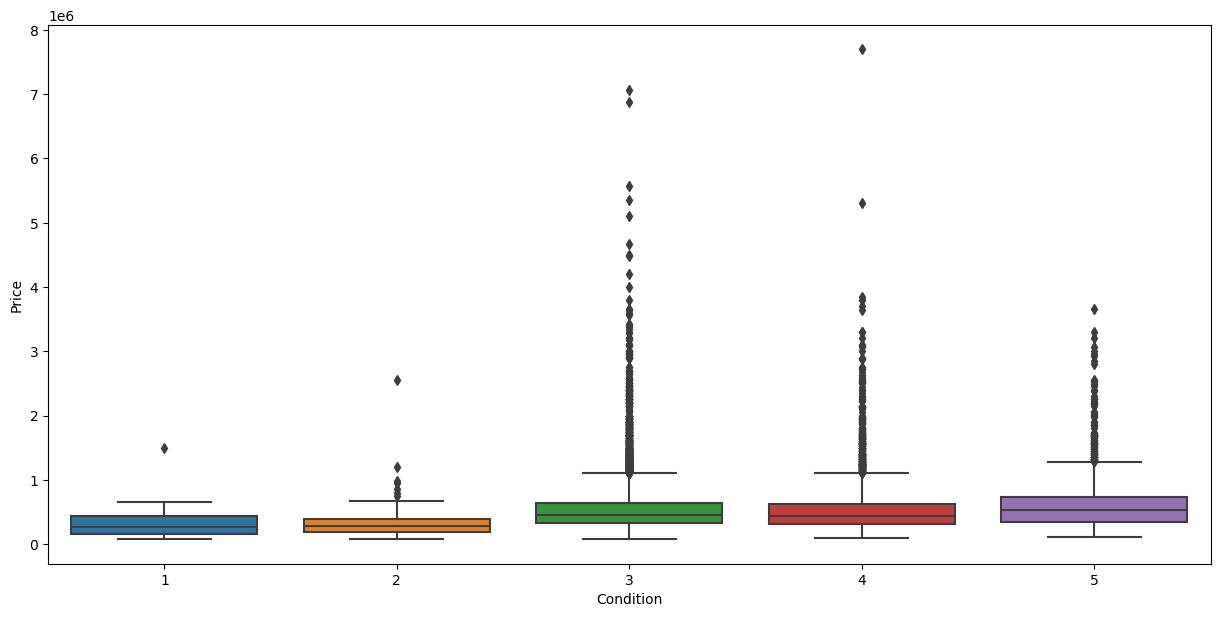

In [53]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Condition', y='Price', data=df)
plt.show()

As you can see from Figure above, there are five kinds of data in the Condition column. These numbers indicate an index from 1 to 5 on the condition of the apartment.

### 3. Changing The Condition Column's Value

I will change these values into 1 = Poor Conditio, 2 = Fair Condition, 3 = Average Condition, 4 = Good Condition, 5= Very Good Condition.

In [54]:
mask_condition = {1:"Poor Condition", 2:"Fair Condition", 3:"Average Condition", 4:"Good Condition", 5:"Very Good Condition"}
df['Condition'] = df['Condition'].map(mask_condition)

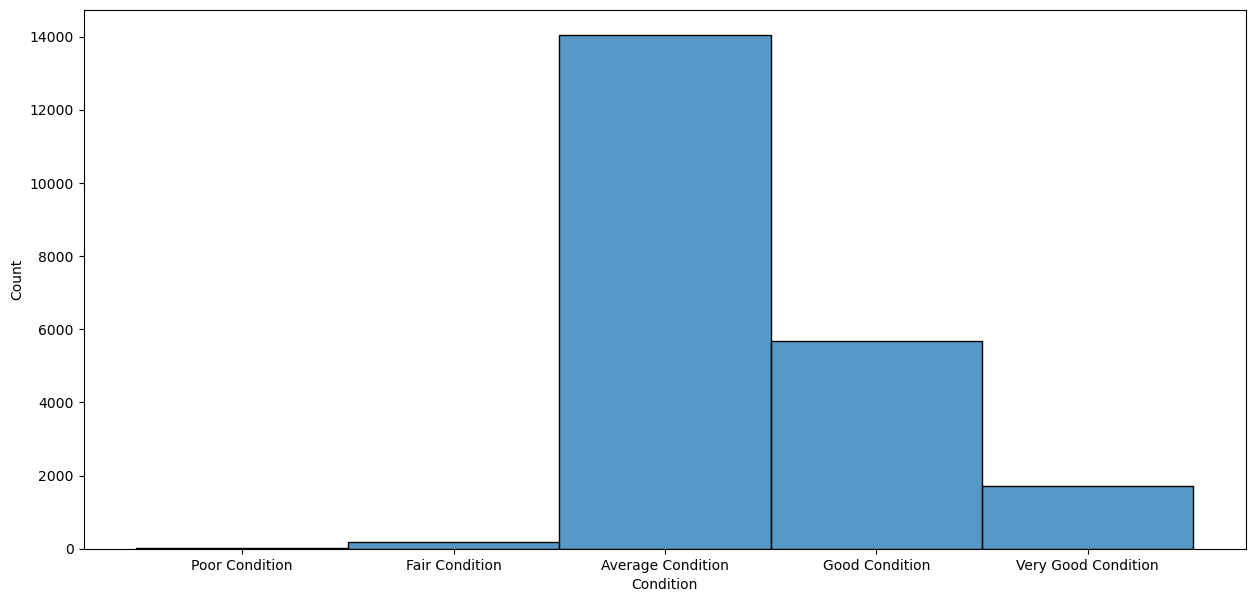

In [55]:
df['Condition'] = pd.Categorical(df['Condition'], ["Poor Condition", "Fair Condition", "Average Condition", "Good Condition", "Very Good Condition"])
plt.figure(figsize=(15, 7))
sns.histplot(df['Condition'])
plt.show()

### 4. Checking The Description of The Condition Column

In [56]:
df["Condition"].describe().to_frame().T

,count,unique,top,freq
Condition,21613,5,Average Condition,14031


### 5. Checking The Missing Value in The Condition Column

In [57]:
missing_value_Condition = df["Condition"].isnull().sum()
if missing_value_Condition > 0:
    print("There are " + str(missing_value_Condition) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.11. Checking The grade Column</center></h2>

The grade column containing an index of the level of construction and design.

### 1. Renaming The Column's Name

In [58]:
df.rename(columns ={'grade': 'Grade'}, inplace=True)

### 2. Plotting The Grade Column

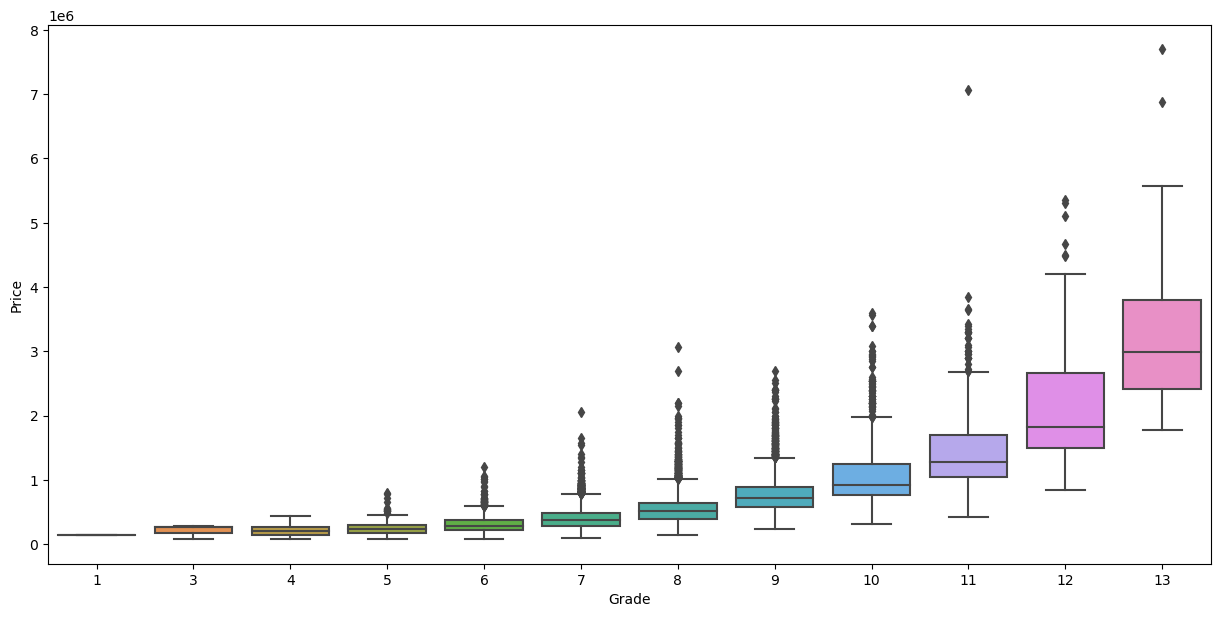

In [59]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Grade', y='Price', data=df)
plt.show()

As you can see from Figure above, there are 13 kinds of data in the Grade column. These numbers indicate an index of the level of construction and design.

### 3. Changing The Grade Column's Value

I will change these values into 1-3 = Poor Grade, 4-6 = Fair Grade, 7 = Average Grade, 8-10 = Good Grade, 11-13= Very Good Grade.

In [60]:
mask_grade = {1:"Poor Grade", 2:"Poor Grade", 3:"Poor Grade", 
                  4:"Fair Grade", 5:"Fair Grade", 6:"Fair Grade", 
                  7:"Average Grade", 
                  8:"Good Grade", 9:"Good Grade", 10:"Good Grade", 
                  11:"Very Good Grade", 12:"Very Good Grade", 13:"Very Good Grade"}
df['Grade'] = df['Grade'].map(mask_grade)

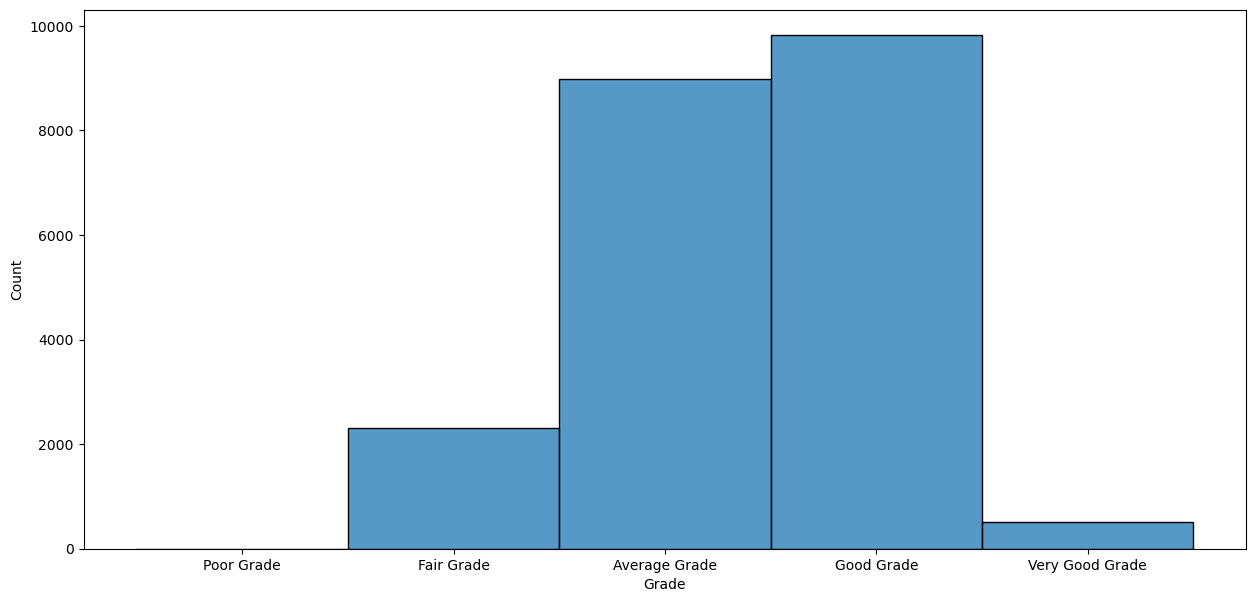

In [61]:
df['Grade'] = pd.Categorical(df['Grade'], ["Poor Grade", "Fair Grade", "Average Grade", "Good Grade", "Very Good Grade"])
plt.figure(figsize=(15, 7))
sns.histplot(df['Grade'])
plt.show()

### 4. Checking The Description of The Grade Column

In [62]:
df["Grade"].describe().to_frame().T

,count,unique,top,freq
Grade,21613,5,Good Grade,9817


### 5. Checking The Missing Value in The Grade Column

In [63]:
missing_value_Grade = df["Grade"].isnull().sum()
if missing_value_Grade > 0:
    print("There are " + str(missing_value_Grade) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.12. Checking The sqft_basement Column</center></h2>

The sqft_basement column containing the square footage of the interior housing space that is below ground level.

### 1. Renaming The Column's Name

In [64]:
df.rename(columns ={'sqft_basement': 'Basement'}, inplace=True)

### 2. Plotting The Basement Column

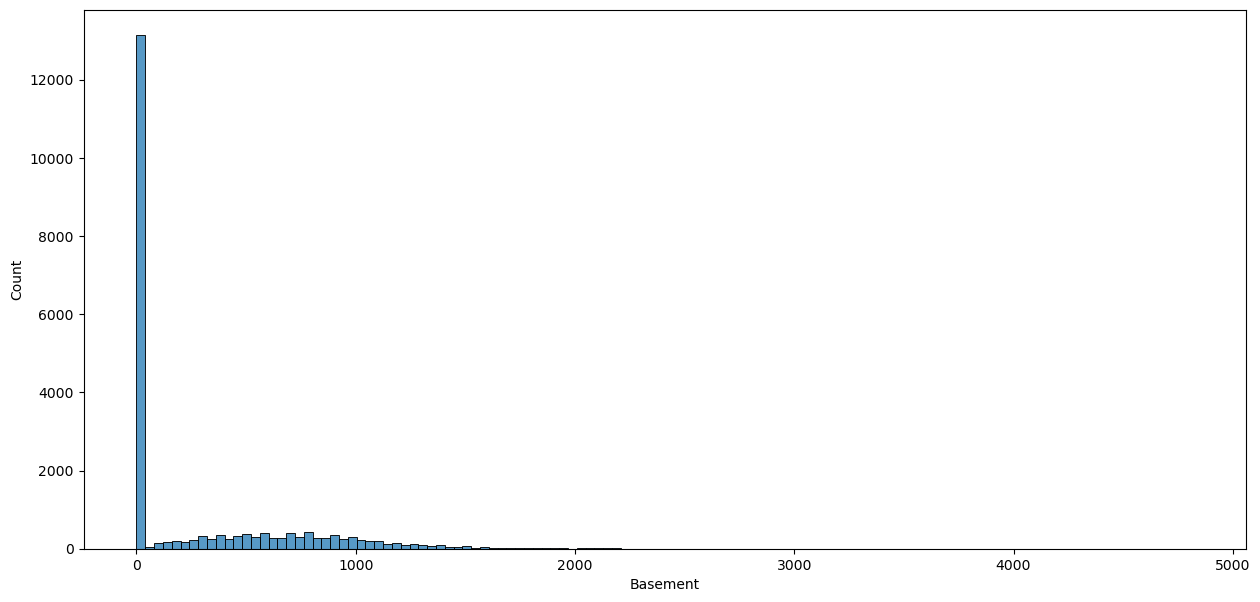

In [65]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Basement'])
plt.show()

### 3. Changing The Basement Column's Value

Initially, this column provided information on how big the basement is. But I decided to change this column to give information on whether this house has a basement or not.

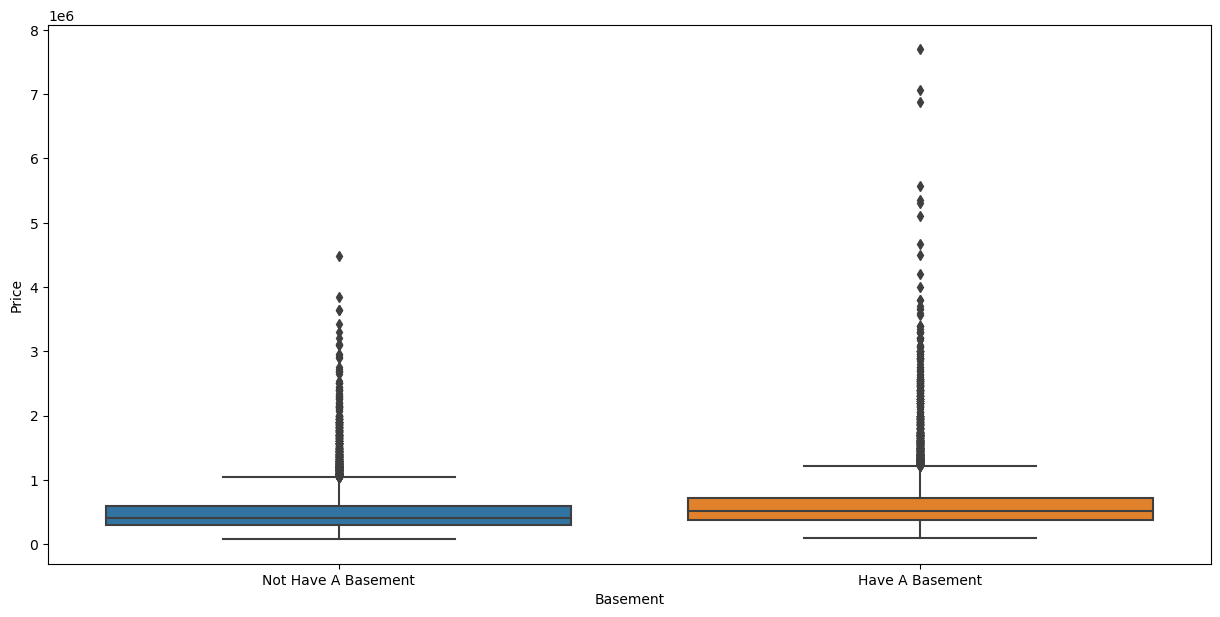

In [66]:
df['Basement'] = df['Basement'].apply(lambda x: 0 if x == 0 else 1)
mask_basement = {0:"Not Have A Basement", 1:"Have A Basement"}
df['Basement'] = df['Basement'].map(mask_basement)
plt.figure(figsize=(15, 7))
sns.boxplot(x='Basement', y='Price', data=df)
plt.show()

### 4. Checking The Description of The Basement Column

In [67]:
df["Basement"].describe().to_frame().T

,count,unique,top,freq
Basement,21613,2,Not Have A Basement,13126


### 5. Checking The Missing Value in The Basement Column

In [68]:
missing_value_Basement = df["Basement"].isnull().sum()
if missing_value_Basement > 0:
    print("There are " + str(missing_value_Basement) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.13. Checking The yr_built Column</center></h2>

The yr_built column containing the year the house was initially built.

### 1. Renaming The Column's Name

In [69]:
df.rename(columns ={'yr_built': 'Year Built'}, inplace=True)

### 2. Plotting The Year Built Column

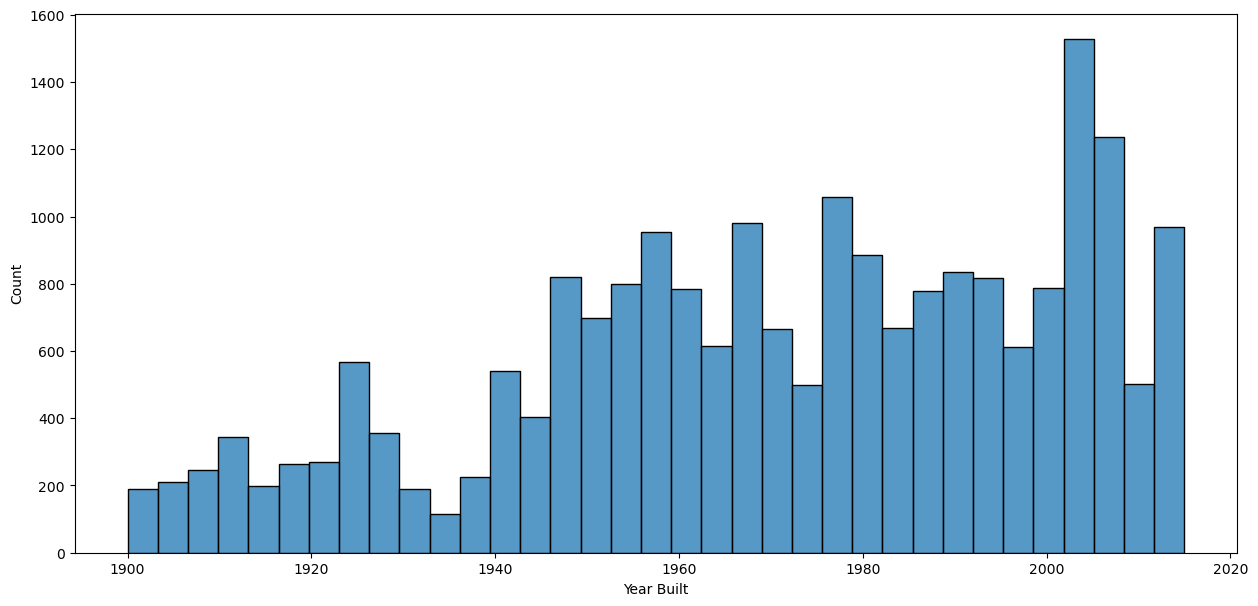

In [70]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Year Built'])
plt.show()

### 3. Changing The Year Built Column's Value

Initially, this column provided information on what year the house was initially built. But I decided to change this column to give information on how old is this house.

In [71]:
today = date.today()
df['Age'] = today.year - df['Year Built']
df.loc[(df['Age'] <= 20), "Group Age"] = '0-20'
df.loc[(df['Age'].between(21,40)), "Group Age"] = '21-40'
df.loc[(df['Age'].between(41,60)), "Group Age"] = '41-60'
df.loc[(df['Age'].between(61,80)), "Group Age"] = '61-80'
df.loc[(df['Age'].between(81,100)), "Group Age"] = '81-100'
df.loc[(df['Age'] > 100), "Group Age"] = 'More Than 100'

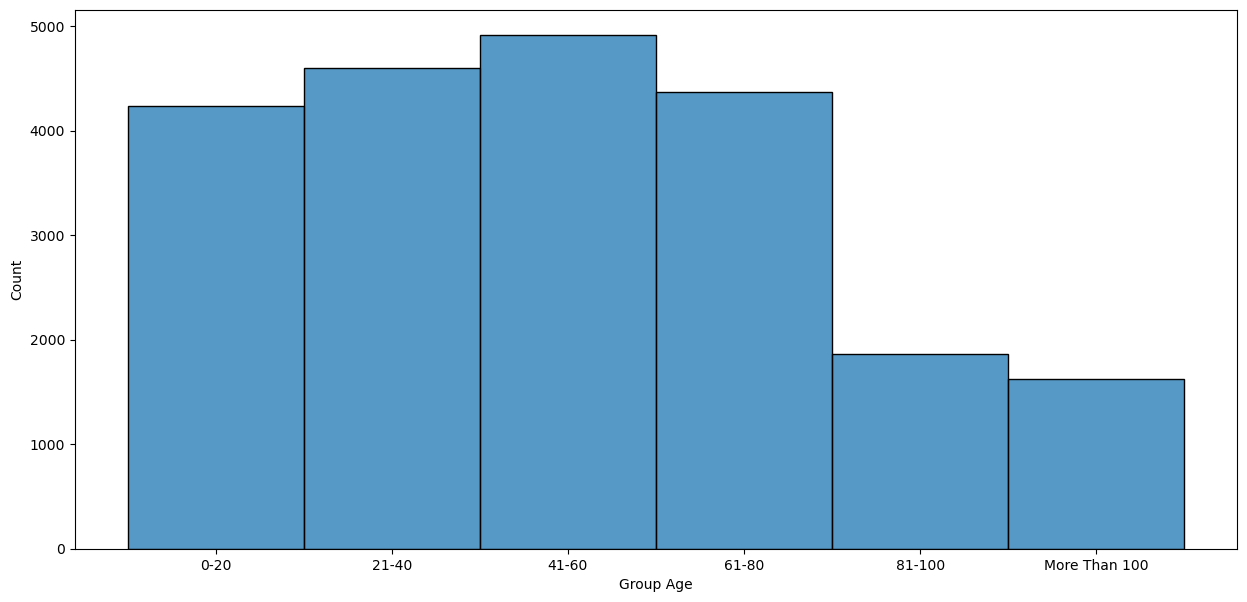

In [72]:
df['Group Age'] = pd.Categorical(df['Group Age'], ["0-20", "21-40", "41-60", "61-80", "81-100", "More Than 100"])
plt.figure(figsize=(15, 7))
sns.histplot(df['Group Age'])
plt.show()

### 4. Removing The Year Built And The Age Column

In [73]:
df = df.drop(['Year Built', 'Age'], axis=1)

### 5. Checking The Description of The Group Age Column

In [74]:
df["Group Age"].describe().to_frame().T

,count,unique,top,freq
Group Age,21613,6,41-60,4912


### 6. Checking The Missing Value in The Group Age Column

In [75]:
missing_value_Group_Age = df["Group Age"].isnull().sum()
if missing_value_Group_Age > 0:
    print("There are " + str(missing_value_Group_Age) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.14. Checking The yr_renovated Column</center></h2>

The yr_renovated column containing the year of the house’s last renovation.

### 1. Renaming The Column's Name

In [76]:
df.rename(columns ={'yr_renovated': 'Renovated'}, inplace=True)

### 2. Plotting The Renovated Column

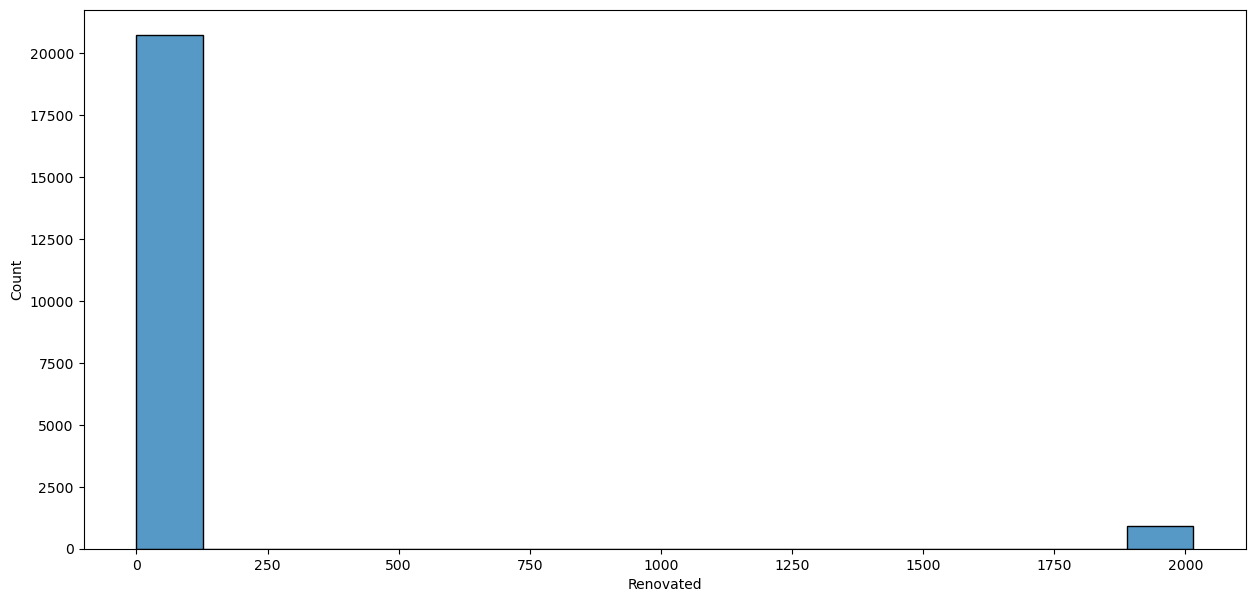

In [77]:
plt.figure(figsize=(15, 7))
sns.histplot(df['Renovated'])
plt.show()

### 3. Changing The Renovated Column's Value

Initially, this column provided information on when was the last time this house was renovated. I decided to change this column to give information on whether this house had been renovated or not.

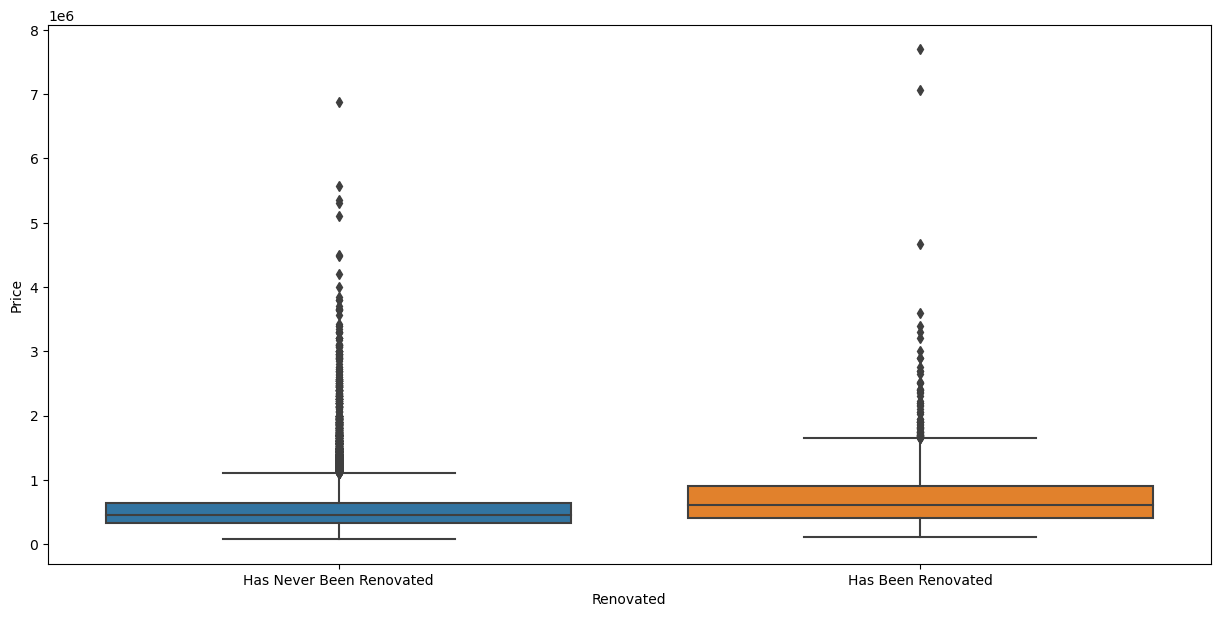

In [78]:
df['Renovated'] = df['Renovated'].apply(lambda x: 0 if x == 0 else 1)
mask_renovated = {0:"Has Never Been Renovated", 1:"Has Been Renovated"}
df['Renovated'] = df['Renovated'].map(mask_renovated)
plt.figure(figsize=(15, 7))
sns.boxplot(x='Renovated', y='Price', data=df)
plt.show()

### 4. Checking The Description of The Renovated Column

In [79]:
df["Renovated"].describe().to_frame().T

,count,unique,top,freq
Renovated,21613,2,Has Never Been Renovated,20699


### 5. Checking The Missing Value in The Renovated Column

In [80]:
missing_value_Renovated = df["Renovated"].isnull().sum()
if missing_value_Renovated > 0:
    print("There are " + str(missing_value_Renovated) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.15. Checking The zipcode Column</center></h2>

The zipcode column containing the zipcode area the house is in.

### 1. Renaming The Column's Name

In [81]:
df.rename(columns ={'zipcode': 'ZIP'}, inplace=True)

### 2. Plotting The ZIP Column

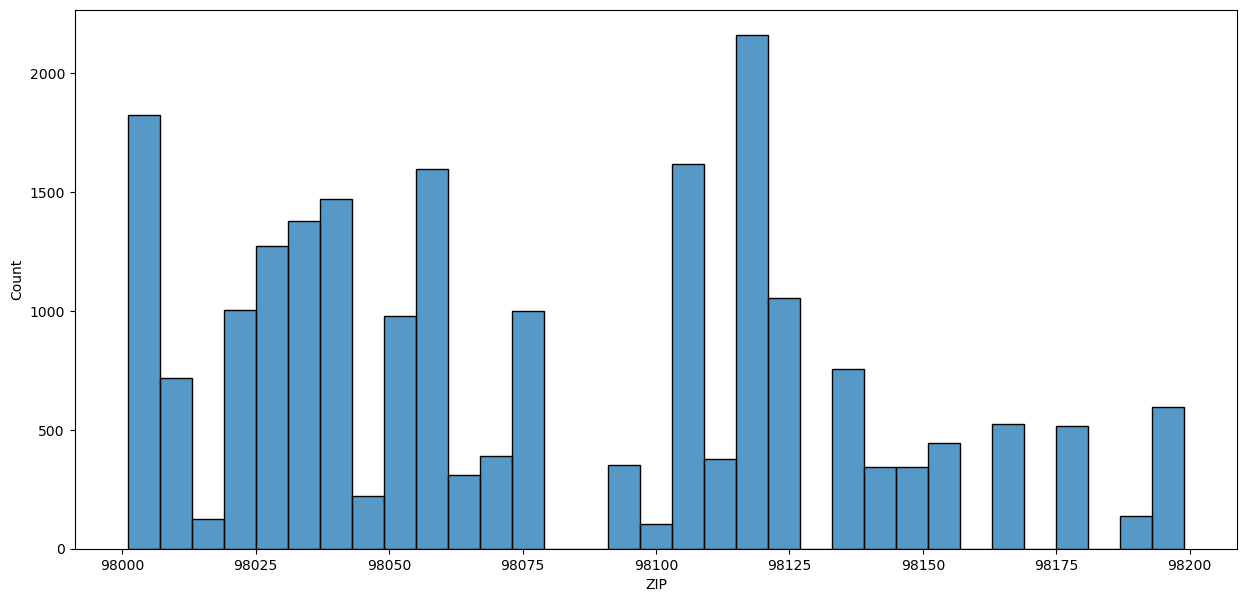

In [82]:
plt.figure(figsize=(15, 7))
sns.histplot(df['ZIP'])
plt.show()

### 3. Changing The ZIP Column's Data Type

In [83]:
df['ZIP'] = pd.Categorical(df['ZIP'])

### 4. Checking The Description of The ZIP Column

In [84]:
df["ZIP"].describe().to_frame().T

,count,unique,top,freq
ZIP,21613,70,98103,602


### 5. Checking The Missing Value in The ZIP Column

In [85]:
missing_value_ZIP = df["ZIP"].isnull().sum()
if missing_value_ZIP > 0:
    print("There are " + str(missing_value_ZIP) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.16. Checking The lat Column</center></h2>

The lat column containing the latitude the house is in.

### 1. Renaming The Column's Name

In [86]:
df.rename(columns ={'lat': 'Latitude'}, inplace=True)

### 2. Checking The Missing Value in The Latitude Column

In [87]:
missing_value_Latitude = df["Latitude"].isnull().sum()
if missing_value_Latitude > 0:
    print("There are " + str(missing_value_Latitude) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>B.17. Checking The long Column</center></h2>

The long column containing the longitude the house is in.

### 1. Renaming The Column's Name

In [88]:
df.rename(columns ={'long': 'Longitude'}, inplace=True)

### 2. Checking The Missing Value in The Longitude Column

In [89]:
missing_value_Longitude = df["Longitude"].isnull().sum()
if missing_value_Longitude > 0:
    print("There are " + str(missing_value_Longitude) + " missing values in this column.")
else:
    print("There is no missing values in this column.")

There is no missing values in this column.


<h2><center>C. Data Exploration</center></h2>

In [90]:
df.head()

,ID,Date,Price,Bedrooms,Bathrooms,Square Meter Living,Square Meter Lot,Floors,Waterfront,View,Condition,Grade,Square Meter Above,Basement,Renovated,ZIP,Latitude,Longitude,Square Meter Living 15,Square Meter Lot 15,Group Age
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,Not Have A Waterfront,No View,Average Condition,Average Grade,110.0,Not Have A Basement,Has Never Been Renovated,98178,47.5112,-122.257,124.0,525.0,61-80
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,Not Have A Waterfront,No View,Average Condition,Average Grade,202.0,Have A Basement,Has Been Renovated,98125,47.7210,-122.319,157.0,710.0,61-80
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,Not Have A Waterfront,No View,Average Condition,Fair Grade,72.0,Not Have A Basement,Has Never Been Renovated,98028,47.7379,-122.233,253.0,749.0,81-100
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,Not Have A Waterfront,No View,Very Good Condition,Average Grade,98.0,Have A Basement,Has Never Been Renovated,98136,47.5208,-122.393,126.0,465.0,41-60
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,Not Have A Waterfront,No View,Average Condition,Good Grade,156.0,Not Have A Basement,Has Never Been Renovated,98074,47.6168,-122.045,167.0,697.0,21-40


### 1. Looking For The Highest Price

In [91]:
highest_price = df.sort_values(by = "Price", ascending = False).reset_index()
print("The Building That Has The Highest Price Is In Latitude " + str(highest_price["Latitude"][0]) + ", Longitude " + str(highest_price["Longitude"][0]) + ", ZIP " + str(highest_price["ZIP"][0]) + " With " + str(highest_price["Price"][0].astype(int)) + " USD.")

The Building That Has The Highest Price Is In Latitude 47.6298, Longitude -122.323, ZIP 98102 With 7700000 USD.


### 2. Looking For The Lowest Price</center></h3>

In [92]:
lowest_price = df.sort_values(by = "Price", ascending = True).reset_index()
print("The Building That Has The Lowest Price Is In Latitude " + str(lowest_price["Latitude"][0]) + ", Longitude " + str(lowest_price["Longitude"][0]) + ", ZIP " + str(lowest_price["ZIP"][0]) + " With " + str(lowest_price["Price"][0].astype(int)) + " USD.")

The Building That Has The Lowest Price Is In Latitude 47.2638, Longitude -121.906, ZIP 98022 With 75000 USD.


### 3. Looking For The Average Price For Bedrooms

In [93]:
bedrooms_price = df.groupby(["Bedrooms"])["Price"].mean().sort_values(ascending = False).reset_index().astype(int)
print("The Building That Has " + str(bedrooms_price["Bedrooms"][0]) + " Bedrooms, Has The Highest Average Price With " + str(bedrooms_price["Price"][0]) + " USD.")
bedrooms_price

The Building That Has 8 Bedrooms, Has The Highest Average Price With 1105076 USD.


,Bedrooms,Price
0,8,1105076
1,7,951184
2,9,893999
3,6,825520
4,10,819333
5,5,786599
6,33,640000
7,4,635419
8,11,520000
9,3,466232


### 4. Looking For The Average Price For Bathrooms

In [94]:
Bathrooms_price = df.groupby(["Bathrooms"])["Price"].mean().sort_values(ascending = False).reset_index()
Bathrooms_price["Price"] = Bathrooms_price["Price"].astype(int)
print("The Building That Has " + str(Bathrooms_price["Bathrooms"][0]) + " Bathrooms, Has The Highest Average Price With " + str(Bathrooms_price["Price"][0]) + " USD.")
Bathrooms_price

The Building That Has 7.75 Bathrooms, Has The Highest Average Price With 6885000 USD.


,Bathrooms,Price
0,7.75,6885000
1,8.00,4990000
2,6.25,3094000
3,6.00,2946833
4,6.75,2734000
5,5.50,2522300
6,5.75,2492500
7,4.75,2021303
8,5.25,1817176
9,6.50,1709445


### 5. Looking For The Average Price For Floors

In [95]:
Floors_price = df.groupby(["Floors"])["Price"].mean().sort_values(ascending = False).reset_index()
Floors_price["Price"] = Floors_price["Price"].astype(int)
print("The Building That Has " + str(Floors_price["Floors"][0]) + " Floors, Has The Highest Average Price With " + str(Floors_price["Price"][0]) + " USD.")
Floors_price

The Building That Has 2.5 Floors, Has The Highest Average Price With 1060346 USD.


,Floors,Price
0,2.5,1060346
1,3.5,933312
2,2.0,648891
3,3.0,582526
4,1.5,558980
5,1.0,442180


### 6. Looking For The Average Price For Waterfront

In [96]:
Waterfront_price = df.groupby(["Waterfront"])["Price"].mean().sort_values(ascending = False).reset_index()
Waterfront_price["Price"] = Waterfront_price["Price"].astype(int)
print("The Building That Does " + str(Waterfront_price["Waterfront"][0]) + ", Has The Highest Average Price With " + str(Waterfront_price["Price"][0]) + " USD.")
Waterfront_price

The Building That Does Have A Waterfront, Has The Highest Average Price With 1661876 USD.


,Waterfront,Price
0,Have A Waterfront,1661876
1,Not Have A Waterfront,531563


### 7. Looking For The Average Price For Basement

In [97]:
Basement_price = df.groupby(["Basement"])["Price"].mean().sort_values(ascending = False).reset_index()
Basement_price["Price"] = Basement_price["Price"].astype(int)
print("The Building That Does " + str(Basement_price["Basement"][0]) + ", Has The Highest Average Price With " + str(Basement_price["Price"][0]) + " USD.")
Basement_price

The Building That Does Have A Basement, Has The Highest Average Price With 622373 USD.


,Basement,Price
0,Have A Basement,622373
1,Not Have A Basement,486884


### 8. Looking For The Average Price For Renovated

In [98]:
Renovated_price = df.groupby(["Renovated"])["Price"].mean().sort_values(ascending = False).reset_index()
Renovated_price["Price"] = Renovated_price["Price"].astype(int)
print("The Building That " + str(Renovated_price["Renovated"][0]) + ", Has The Highest Average Price With " + str(Renovated_price["Price"][0]) + " USD.")
Renovated_price

The Building That Has Been Renovated, Has The Highest Average Price With 760379 USD.


,Renovated,Price
0,Has Been Renovated,760379
1,Has Never Been Renovated,530360


### 9. Looking For The Average Price in Every ZIP Code

In [99]:
ZIP_price = df.groupby(["ZIP"])["Price"].mean().sort_values(ascending = False).reset_index()
ZIP_price["Price"] = ZIP_price["Price"].astype(int)
print("ZIP Code " + str(ZIP_price["ZIP"][0]) + " Has The Highest Average Price With " + str(ZIP_price["Price"][0]) + " USD.")
ZIP_price

ZIP Code 98039 Has The Highest Average Price With 2160606 USD.


,ZIP,Price
0,98039,2160606
1,98004,1355927
2,98040,1194230
3,98112,1095499
4,98102,901258
...,...,...
65,98148,284908
66,98001,280804
67,98032,251296
68,98168,240328


### 10. Checking Which Column That Has The Highest Correlation With The Price Column

In [100]:
df_numerized = df.copy()
cat = ["View", "Condition", "Grade", "ZIP", "Group Age"]
df_numerized = df_numerized.drop(["ID", "Date"], axis=1)
df_numerized[cat] = df_numerized[cat].astype("object")
for column in df_numerized.columns:
    if (df_numerized[column].dtype == "object"):
        df_numerized[column] = df_numerized[column].astype("category")
        df_numerized[column] = df_numerized[column].cat.codes

df_numerized

,Price,Bedrooms,Bathrooms,Square Meter Living,Square Meter Lot,Floors,Waterfront,View,Condition,Grade,Square Meter Above,Basement,Renovated,ZIP,Latitude,Longitude,Square Meter Living 15,Square Meter Lot 15,Group Age
0,221900.0,3,1.00,110.0,525.0,1.0,1,4,0,0,110.0,1,1,66,47.5112,-122.257,124.0,525.0,3
1,538000.0,3,2.25,239.0,673.0,2.0,1,4,0,0,202.0,0,0,55,47.7210,-122.319,157.0,710.0,3
2,180000.0,2,1.00,72.0,929.0,1.0,1,4,0,1,72.0,1,1,16,47.7379,-122.233,253.0,749.0,4
3,604000.0,4,3.00,182.0,465.0,1.0,1,4,4,0,98.0,0,1,58,47.5208,-122.393,126.0,465.0,2
4,510000.0,3,2.00,156.0,751.0,1.0,1,4,0,2,156.0,1,1,37,47.6168,-122.045,167.0,697.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,142.0,105.0,3.0,1,4,0,2,142.0,1,1,42,47.6993,-122.346,142.0,140.0,0
21609,400000.0,4,2.50,215.0,540.0,2.0,1,4,0,2,215.0,1,1,60,47.5107,-122.362,170.0,669.0,0
21610,402101.0,2,0.75,95.0,125.0,2.0,1,4,0,0,95.0,1,1,59,47.5944,-122.299,95.0,186.0,0
21611,400000.0,3,2.50,149.0,222.0,2.0,1,4,0,2,149.0,1,1,15,47.5345,-122.069,131.0,120.0,0


In [101]:
corr_mat_num = df_numerized.corr(method = "pearson")
corr_mat_num

,Price,Bedrooms,Bathrooms,Square Meter Living,Square Meter Lot,Floors,Waterfront,View,Condition,Grade,Square Meter Above,Basement,Renovated,ZIP,Latitude,Longitude,Square Meter Living 15,Square Meter Lot 15,Group Age
Price,1.000000,0.308350,0.525138,0.702016,0.089662,0.256794,-0.266369,-0.307756,0.022141,0.509446,0.605535,-0.180230,-0.126092,-0.050889,0.307003,0.021626,0.585378,0.082449,-0.051167
Bedrooms,0.308350,1.000000,0.515884,0.576682,0.031704,0.175429,0.006582,-0.067946,0.010865,0.219954,0.477617,-0.163471,-0.018553,-0.152008,-0.008931,0.129473,0.391649,0.029243,-0.143237
Bathrooms,0.525138,0.515884,1.000000,0.754674,0.087740,0.500653,-0.063744,-0.148692,-0.154084,0.505470,0.685359,-0.163534,-0.050260,-0.192873,0.024573,0.223042,0.568612,0.087175,-0.496029
Square Meter Living,0.702016,0.576682,0.754674,1.000000,0.172818,0.353934,-0.103817,-0.230952,-0.081353,0.571547,0.876589,-0.204501,-0.055109,-0.192006,0.052537,0.240228,0.756422,0.183283,-0.306006
Square Meter Lot,0.089662,0.031704,0.087740,0.172818,1.000000,-0.005201,-0.021603,-0.050722,0.000013,0.095889,0.183522,0.035345,-0.007745,-0.125899,-0.085682,0.229520,0.144649,0.718557,-0.045263
Floors,0.256794,0.175429,0.500653,0.353934,-0.005201,1.000000,-0.023698,-0.015812,-0.287713,0.406278,0.523892,0.256560,-0.006260,-0.038788,0.049614,0.125419,0.279882,-0.011270,-0.497912
Waterfront,-0.266369,0.006582,-0.063744,-0.103817,-0.021603,-0.023698,1.000000,0.238917,-0.019023,-0.075190,-0.072074,0.037227,0.093294,-0.029122,0.014274,0.041910,-0.086498,-0.030703,-0.028620
View,-0.307756,-0.067946,-0.148692,-0.230952,-0.050722,-0.015812,0.238917,1.000000,-0.041101,-0.179044,-0.132521,0.167981,0.078107,-0.068800,-0.012504,0.074783,-0.231898,-0.050639,-0.064251
Condition,0.022141,0.010865,-0.154084,-0.081353,0.000013,-0.287713,-0.019023,-0.041101,1.000000,-0.147969,-0.180926,-0.132130,0.063923,0.000761,-0.019168,-0.115105,-0.108465,0.000389,0.394297
Grade,0.509446,0.219954,0.505470,0.571547,0.095889,0.406278,-0.075190,-0.179044,-0.147969,1.000000,0.583732,0.007592,-0.017938,-0.122338,0.074470,0.157871,0.557714,0.095638,-0.329813


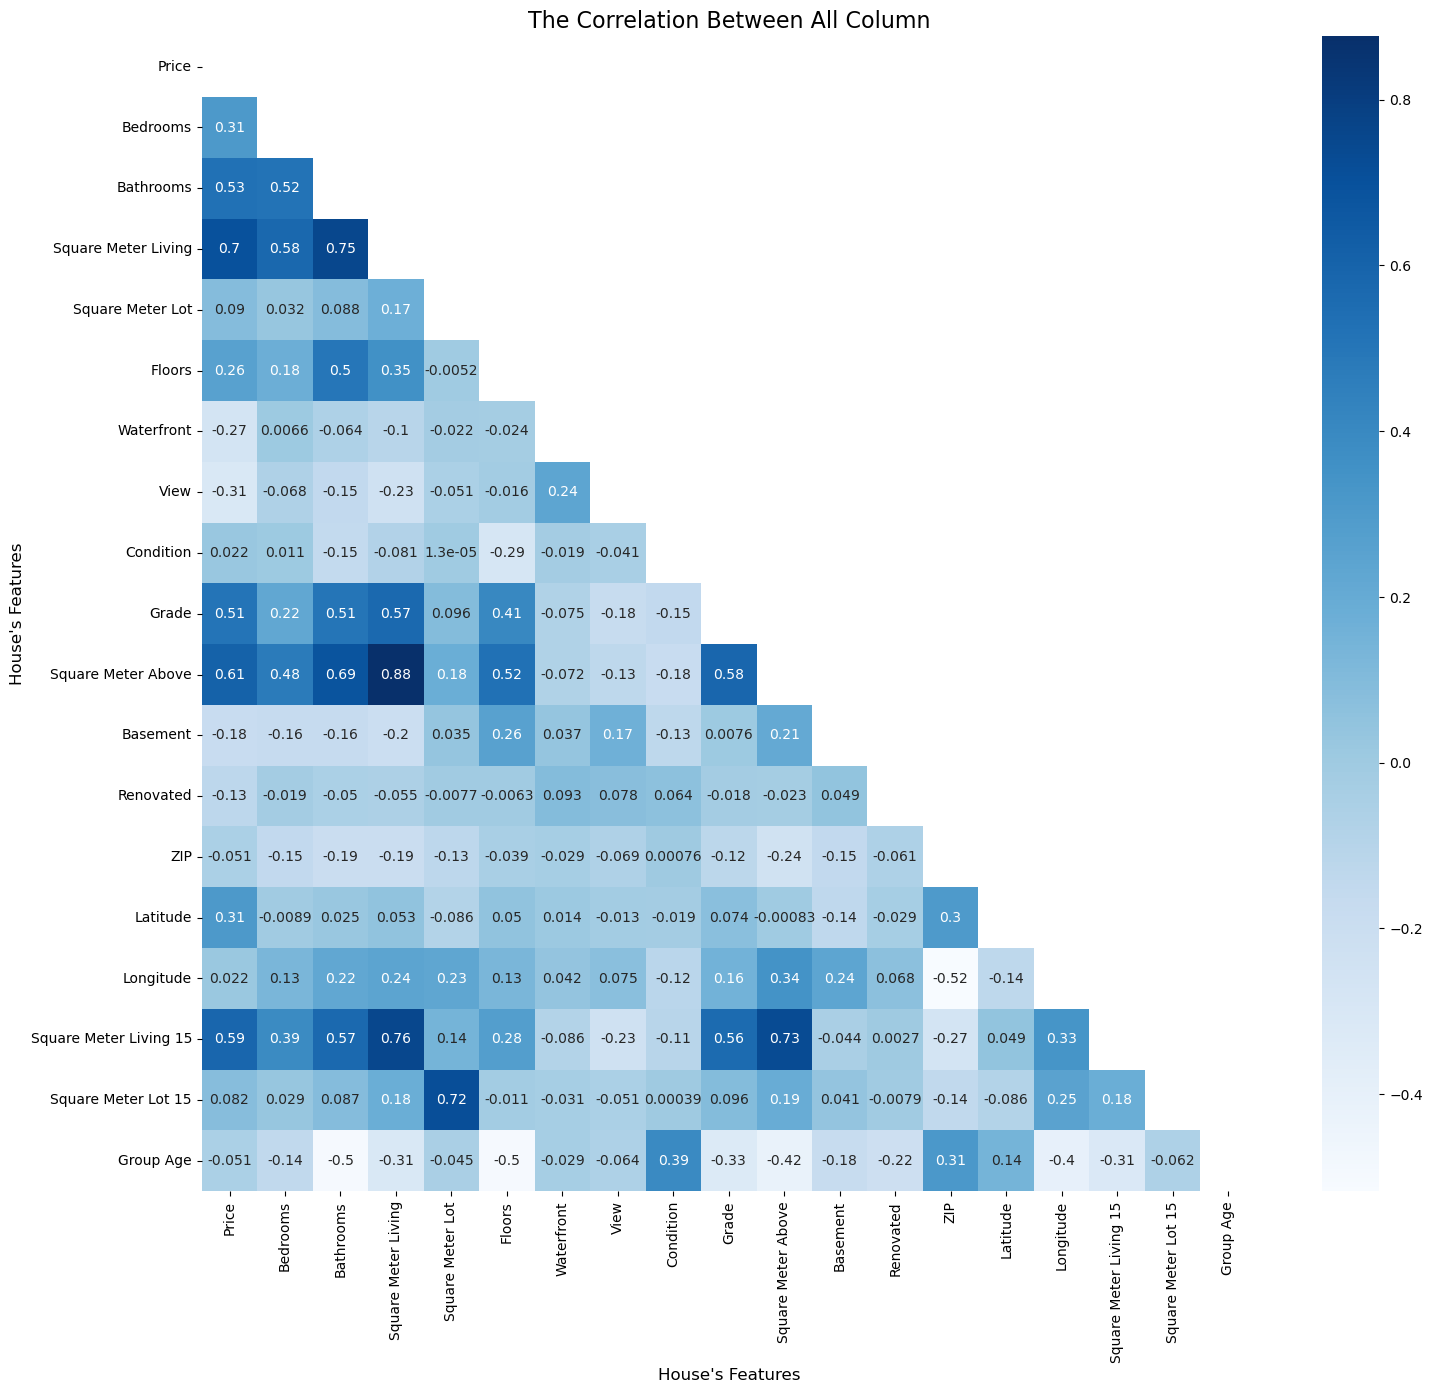

In [102]:
plt.figure(figsize=(17, 15))
corr_mask_num = np.triu(df_numerized.corr(method = "pearson"))
h_map = sns.heatmap(df_numerized.corr(method = "pearson"), mask=corr_mask_num, annot=True, cmap='Blues')
plt.title("The Correlation Between All Column", fontsize = 16)
plt.xlabel("House's Features", fontsize = 12)
plt.ylabel("House's Features", fontsize = 12)
plt.yticks(rotation=360)
plt.show()

In [103]:
corr_pairs_num = corr_mat_num.unstack()
sorted_corr_num = corr_pairs_num.sort_values()
high_corr_num = sorted_corr_num[(sorted_corr_num) > 0.5]
high_corr_num.to_frame("Pearson Correlation")

Pearson Correlation
Bathrooms              Floors                             0.500653
Floors                 Bathrooms                          0.500653
Bathrooms              Grade                              0.505470
Grade                  Bathrooms                          0.505470
                       Price                              0.509446
Price                  Grade                              0.509446
Bathrooms              Bedrooms                           0.515884
Bedrooms               Bathrooms                          0.515884
Square Meter Above     Floors                             0.523892
Floors                 Square Meter Above                 0.523892
Price                  Bathrooms                          0.525138
Bathrooms              Price                              0.525138
Square Meter Living 15 Grade                              0.557714
Grade                  Square Meter Living 15             0.557714
Bathrooms              Square Meter Living 15             0.568612
Square Meter Living 15 Bathrooms                          0.568612
Grade                  Square Meter Living                0.571547
Square Meter Living    Grade                              0.571547
Bedrooms               Square Meter Living                0.576682
Square Meter Living    Bedrooms                           0.576682
Square Meter Above     Grade                              0.583732
Grade                  Square Meter Above                 0.583732
Price                  Square Meter Living 15             0.585378
Square Meter Living 15 Price                              0.585378
Price                  Square Meter Above                 0.605535
Square Meter Above     Price                              0.605535
Bathrooms              Square Meter Above                 0.685359
Square Meter Above     Bathrooms                          0.685359
Square Meter Living    Price                              0.702016
Price                  Square Meter Living                0.702016
Square Meter Lot 15    Square Meter Lot                   0.718557
Square Meter Lot       Square Meter Lot 15                0.718557
Square Meter Living 15 Square Meter Above                 0.731832
Square Meter Above     Square Meter Living 15             0.731832
Bathrooms              Square Meter Living                0.754674
Square Meter Living    Bathrooms                          0.754674
Square Meter Living 15 Square Meter Living                0.756422
Square Meter Living    Square Meter Living 15             0.756422
Square Meter Above     Square Meter Living                0.876589
Square Meter Living    Square Meter Above                 0.876589
Price                  Price                              1.000000
Grade                  Grade                              1.000000
Square Meter Living 15 Square Meter Living 15             1.000000
Bedrooms               Bedrooms                           1.000000
Bathrooms              Bathrooms                          1.000000
Square Meter Living    Square Meter Living                1.000000
Square Meter Lot       Square Meter Lot                   1.000000
Floors                 Floors                             1.000000
Waterfront             Waterfront                         1.000000
Square Meter Lot 15    Square Meter Lot 15                1.000000
View                   View                               1.000000
Square Meter Above     Square Meter Above                 1.000000
Basement               Basement                           1.000000
Renovated              Renovated                          1.000000
ZIP                    ZIP                                1.000000
Latitude               Latitude                           1.000000
Longitude              Longitude                          1.000000
Condition              Condition                          1.000000
Group Age              Group Age                          1.000000

The Grade (0.509446), Bathrooms (0.525138), Square Meter Living 15 (0.585378), Square Meter Above (0.605535), And Square Meter Living (0.702016) Column Has The Highest Correlation With The Price Column.

### 11. Checking The Distribution of The Building On The Washington Map.

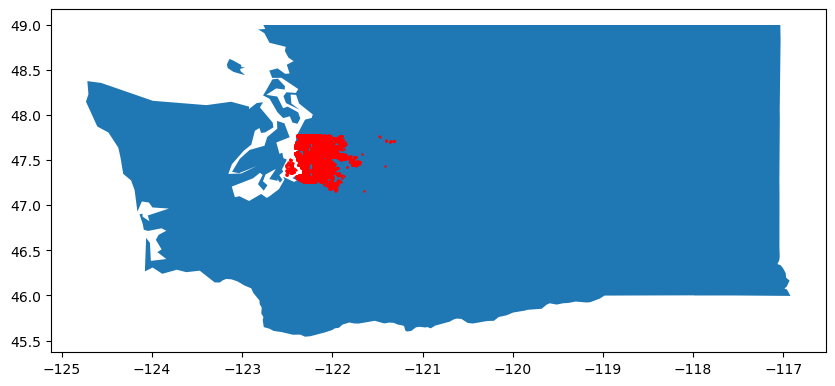

In [142]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
usa = gpd.read_file("USA_States_Generalized.shx")
washington = usa.loc[usa["STATE_ABBR"] == "WA"]
gdf.plot(ax=washington.plot(figsize=(10, 8)), marker='o', color='red', markersize=0.5);

<h2><center>D. Build A Machine Learning Model</center></h2>

### 1. Removing Duplicates in The Data

In this section, I’m going to remove the duplicated data.

In [104]:
df_machine_learning = df.copy()
df_machine_learning = df_machine_learning.drop(["ID", "Date"], axis=1)
df_machine_learning.drop_duplicates(inplace=True)
print('The Shape of The Data Before Removing The Duplicated Data: ', df.shape)
print('The Shape of The Data After Removing The Duplicated Data: ', df_machine_learning.shape)

The Shape of The Data Before Removing The Duplicated Data:  (21613, 21)
The Shape of The Data After Removing The Duplicated Data:  (21605, 19)


### 2. Removing Outliers in The Data

In [105]:
def removing_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR)))]
    return data

In [106]:
df_machine_learning = removing_outliers(df_machine_learning, 'Price')
print('The Shape of The Data After Removing The Outliers: ', df_machine_learning.shape)

The Shape of The Data After Removing The Outliers:  (20465, 19)


### 3. Scaling and Labels Conversion on The Dataset

Next, I will do scaling and labels conversion on the dataset using **StandardScaler, OneHotEncoder, make_pipeline, make_column_selector, and make_column_transformer**.

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector,make_column_transformer

impute_number = SimpleImputer(strategy='most_frequent', add_indicator=True)
scaler = StandardScaler()

impute_category = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

column_number = make_column_selector(dtype_include='number')
column_category = make_column_selector(dtype_exclude='number')

from sklearn.pipeline import make_pipeline
preprocessor = make_column_transformer((make_pipeline(impute_number, scaler), column_number),
                                       (make_pipeline(impute_category, ohe), column_category))

### 4. Separating Features and Labels

The features are the descriptive attributes, and the label is what you’re attempting to predict or forecast. So I will make two variables; the first variable is X with just the features and y with the label only.

In [108]:
X = df_machine_learning.drop('Price', axis=1)
Y = df_machine_learning['Price']

### 5. Preparing Training, Testing, And Validating Dataset

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 6. Create A Function For Evaluation

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_classification(model, X_train, Y_train, X_test, Y_test):
    score=[] 
    
    pred_test = model.predict(X_test)

    pred_test = np.round(pred_test)
    
    mse = mean_squared_error(Y_test, pred_test)
    
    mae = mean_absolute_error(Y_test, pred_test)
    
    rmse = np.sqrt(mse)
    
    score_train = model.score(X_train, Y_train)
    
    score_test = model.score(X_test, Y_test)
        
    score.extend((mse,mae,rmse,score_train,score_test,pred_test))
    
    print('Mean squared error dari Testing Set:', round(mse))
    print('Mean absolute error dari Testing Set:', round(mae))
    print('Root Mean Squared Error dari Testing Set:', round(rmse))
    print('Training Accuracy:', round(score_train, 3))
    print('Testing Accuracy:', round(score_test, 3))
        
    return score

### 7. Create A Function For Saving The Evaluation Result

In [111]:
Mean_Square_Error = []
Mean_Absolute_Error = []
Root_Mean_Square_Error = []
score_train = []
score_test = []

def add_score_model(score):
    Mean_Square_Error.append(score[0])
    Mean_Absolute_Error.append(score[1])
    Root_Mean_Square_Error.append(score[2])
    score_train.append(score[3])
    score_test.append(score[4])

### 8. Building A Machine Learning Linear Regression Model

In [112]:
from sklearn.linear_model import LinearRegression
# model_linreg = LinearRegression()
model_linreg = make_pipeline(preprocessor, LinearRegression())
model_linreg.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_linreg, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Mean squared error dari Testing Set: 7426703181
Mean absolute error dari Testing Set: 63166
Root Mean Squared Error dari Testing Set: 86178
Training Accuracy: 0.828
Testing Accuracy: 0.827


### 9. Building A Machine Learning Random Forest Regressor Model

In [113]:
from sklearn.ensemble import RandomForestRegressor
# model_rfr = RandomForestRegressor(random_state=42)
model_rfr = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
model_rfr.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_rfr, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Mean squared error dari Testing Set: 6090369110
Mean absolute error dari Testing Set: 53831
Root Mean Squared Error dari Testing Set: 78041
Training Accuracy: 0.978
Testing Accuracy: 0.858


### 10. Building A Machine Learning Decision Tree Regressor Model

In [114]:
from sklearn.tree import DecisionTreeRegressor
# model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
model_dtr.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_dtr, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Mean squared error dari Testing Set: 12045156133
Mean absolute error dari Testing Set: 75373
Root Mean Squared Error dari Testing Set: 109750
Training Accuracy: 0.998
Testing Accuracy: 0.72


### 11. Building A Machine Learning Lasso Model

In [115]:
from sklearn.linear_model import Lasso
# model_lasso = Lasso(random_state=42)
model_lasso = make_pipeline(preprocessor, Lasso(random_state=42))
model_lasso.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_lasso, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Mean squared error dari Testing Set: 7426788192
Mean absolute error dari Testing Set: 63164
Root Mean Squared Error dari Testing Set: 86179
Training Accuracy: 0.828
Testing Accuracy: 0.827


C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12502192574158.133, tolerance: 71523756743.39133
  model = cd_fast.sparse_enet_coordinate_descent(


### 12. Building A Machine Learning Ridge Model

In [116]:
from sklearn.linear_model import Ridge
# model_ridge = Ridge(random_state=42)
model_ridge = make_pipeline(preprocessor, Ridge(random_state=42))
model_ridge.fit(X_train, Y_train)
linear_regression_score = eval_classification(model_ridge, X_train, Y_train, X_test, Y_test)
add_score_model(linear_regression_score)

C:\Users\Luthfi\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Mean squared error dari Testing Set: 7510568413
Mean absolute error dari Testing Set: 63395
Root Mean Squared Error dari Testing Set: 86664
Training Accuracy: 0.827
Testing Accuracy: 0.825


### 13. Comparing The Machine Learning Model

In [117]:
comparison = pd.DataFrame({'Model':['Linear Regression', 
                                    'Random Forest', 
                                    'Decision Tree', 
                                    'Lasso', 
                                    'Ridge'], 
                           'Mean Square Error': Mean_Square_Error, 
                           'Mean Absolute Error': Mean_Absolute_Error, 
                           'Root Mean Square Error':Root_Mean_Square_Error, 
                           'Training Accuracy':score_train, 
                           'Testing Accuracy':score_test})

<h2><center>D. Conclusion</center></h2>

1. The Building That Has The Highest Price Is In Latitude 47.6298, Longitude -122.323, ZIP 98102 With 7700000 USD.
2. The Building That Has The Lowest Price Is In Latitude 47.2638, Longitude -121.906, ZIP 98022 With 75000 USD.
3. The Building That Has 8 Bedrooms, Has The Highest Average Price With 1105076 USD.
4. The Building That Has 7.75 Bathrooms, Has The Highest Average Price With 6885000 USD.
5. The Building That Has 2.5 Floors, Has The Highest Average Price With 1060346 USD.
6. The Building That Does Have A Waterfront, Has The Highest Average Price With 1661876 USD.
7. The Building That Does Have A Basement, Has The Highest Average Price With 622373 USD.
8. The Building That Has Been Renovated, Has The Highest Average Price With 760379 USD.
9. ZIP Code 98039 Has The Highest Average Price With 2160606 USD.
10. The Grade (0.509446), Bathrooms (0.525138), Square Meter Living 15 (0.585378), Square Meter Above (0.605535), And Square Meter Living (0.702016) Column Has The Highest Correlation With The Price Column.

In [118]:
comparison.sort_values(by='Testing Accuracy',ascending=False).style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) 

,Model,Mean Square Error,Mean Absolute Error,Root Mean Square Error,Training Accuracy,Testing Accuracy
1,Random Forest,6090369109.969460,53831.399218,78040.816948,0.977736,0.858176
0,Linear Regression,7426703181.455900,63166.331542,86178.321993,0.827978,0.827057
3,Lasso,7426788192.011483,63163.900562,86178.815216,0.827975,0.827055
4,Ridge,7510568412.888346,63394.641095,86663.535659,0.827216,0.825104
2,Decision Tree,12045156133.002932,75373.231126,109750.426573,0.997597,0.719509
